**Dataset description (Kaggle) :**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the **cell nuclei** present in the image.

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Importer les librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import shap

Importer le jeu de données

In [2]:
data = pd.read_csv("C:/Users/sophi/Desktop/DESU Data analyse appliquée aux Neurosciences/Projet perso/BreastCancer/data.csv")

Explorer les données

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

--> Donc 30 colonnes pour les moyennes, écart-types et "maximums" de 10 features.

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Visualiser et nettoyer les données

- Valeurs manquantes ? 

In [7]:
data.isnull().sum() 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Il n'y a apparemment des valeurs manquantes que dans la dernière colonne "Unnamed: 32", qui ne contient d'ailleurs que des NaN. 
Problématique d'anonymisation? Cette colonne peut être supprimée pour l'analyse des données, de même que la colonne Id :

In [8]:
data = data.drop(["Unnamed: 32","id"], axis = 1)

In [9]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

- Doublons ?

In [10]:
data.duplicated().sum() # aucun

0

* Gestion des outliers

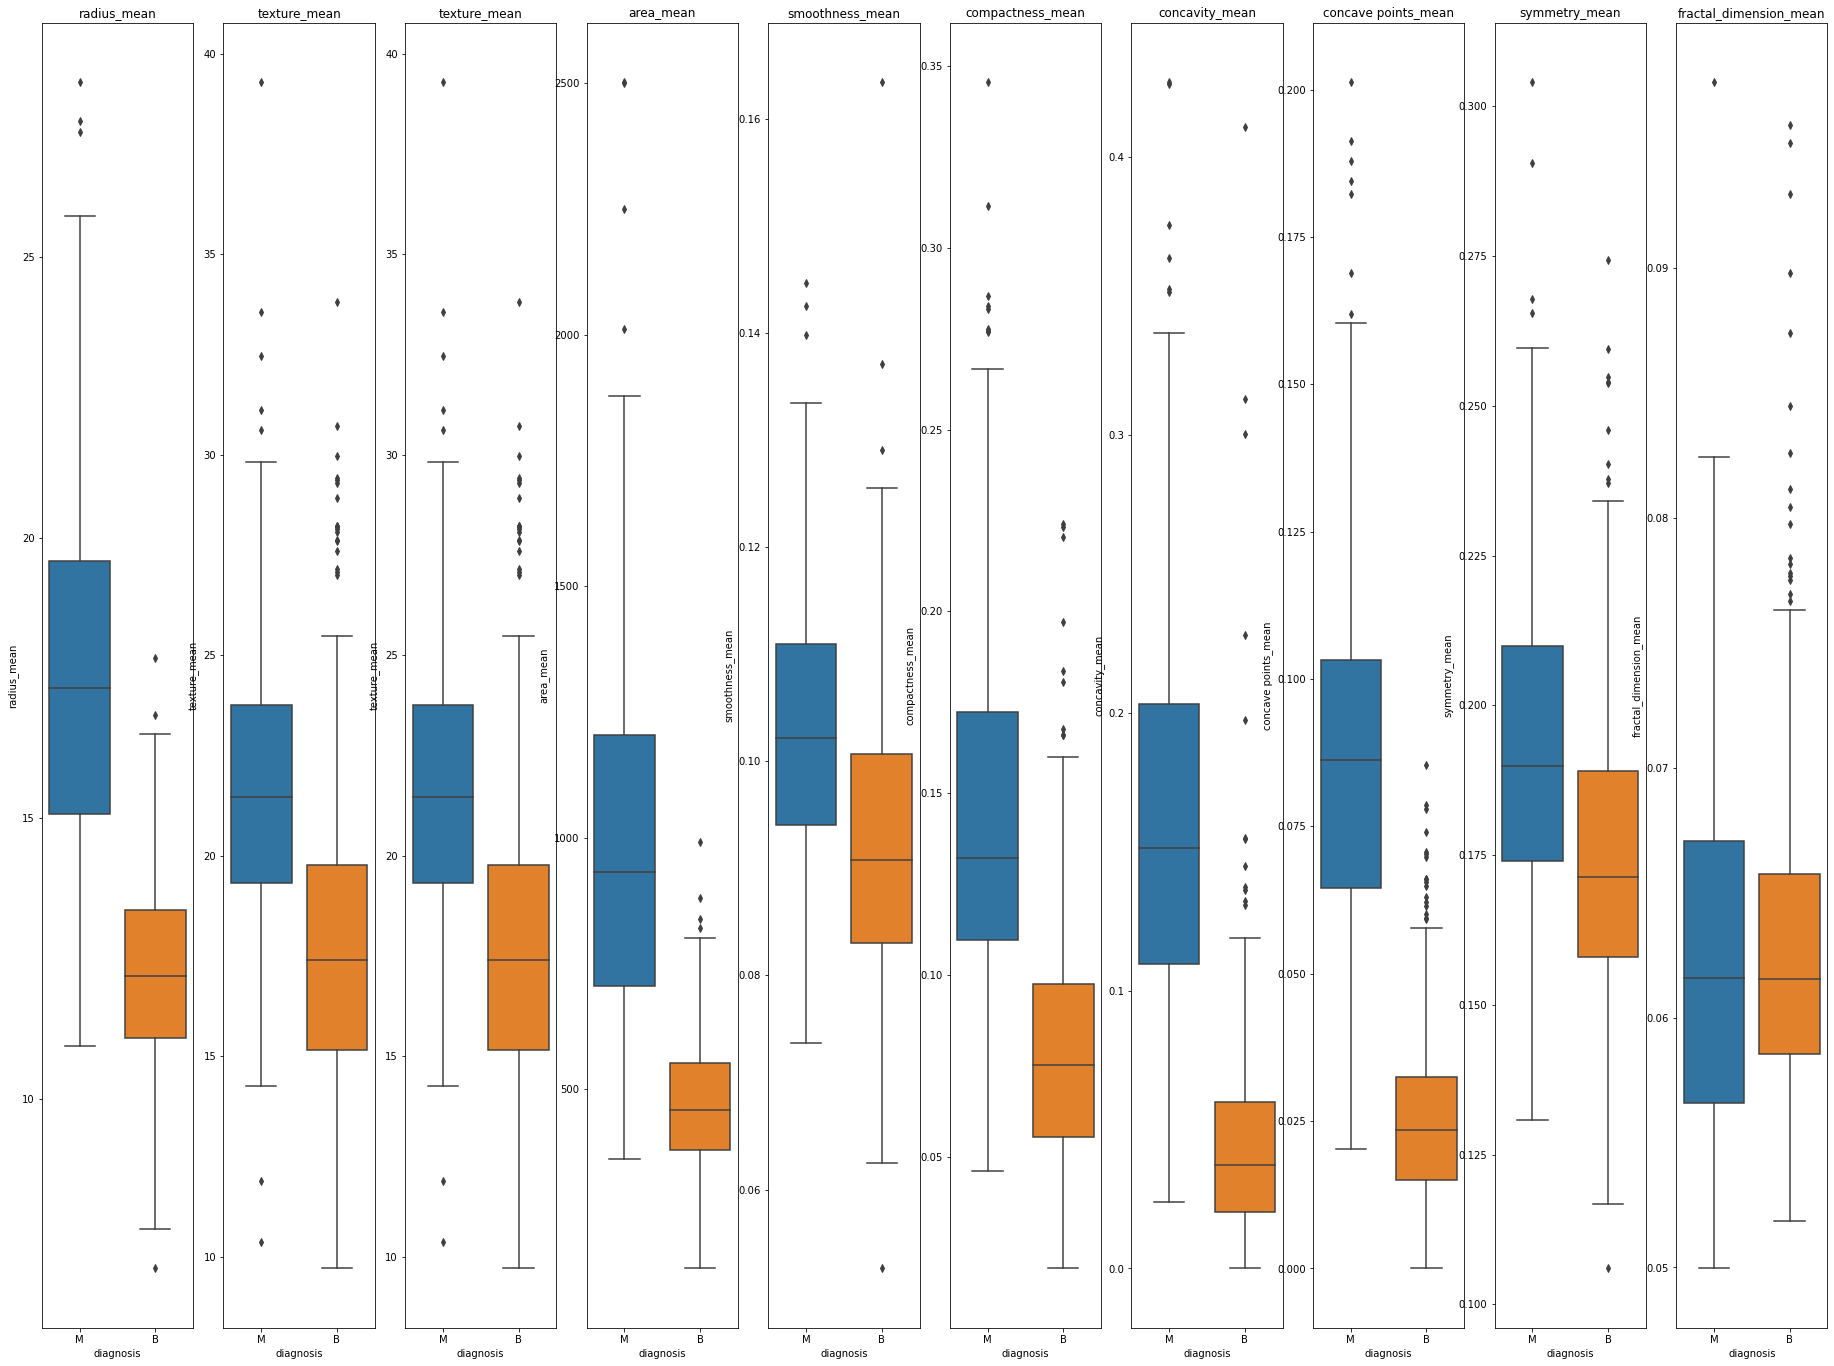

In [11]:
f, axes = plt.subplots(1, 10, figsize=(32, 24))
sns.boxplot(x=data['diagnosis'], y=data['radius_mean'], ax=axes[0])
axes[0].set_title('radius_mean') ;
sns.boxplot(x=data['diagnosis'], y=data['texture_mean'], ax=axes[1])
axes[1].set_title('texture_mean') ;
sns.boxplot(x=data['diagnosis'], y=data['texture_mean'], ax=axes[2])
axes[2].set_title('texture_mean') ;
sns.boxplot(x=data['diagnosis'], y=data['area_mean'], ax=axes[3])
axes[3].set_title('area_mean') ;
sns.boxplot(x=data['diagnosis'], y=data['smoothness_mean'], ax=axes[4])
axes[4].set_title('smoothness_mean') ;
sns.boxplot(x=data['diagnosis'], y=data['compactness_mean'], ax=axes[5])
axes[5].set_title('compactness_mean') ;
sns.boxplot(x=data['diagnosis'], y=data['concavity_mean'], ax=axes[6])
axes[6].set_title('concavity_mean') ;
sns.boxplot(x=data['diagnosis'], y=data['concave points_mean'], ax=axes[7])
axes[7].set_title('concave points_mean') ;
sns.boxplot(x=data['diagnosis'], y=data['symmetry_mean'], ax=axes[8])
axes[8].set_title('symmetry_mean') ;
sns.boxplot(x=data['diagnosis'], y=data['fractal_dimension_mean'], ax=axes[9])
axes[9].set_title('fractal_dimension_mean') ;

In [12]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1

#filtering outliers using the calculated IQR scores
data_filtered = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]
data_filtered.head()

C:\Users\sophi\AppData\Local\Temp/ipykernel_10788/1174254217.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_filtered = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,M,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,M,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,M,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,M,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,M,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287


In [13]:
data_filtered.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,13.376209,18.505879,86.403266,570.547990,0.093271,0.086260,0.060442,0.035902,0.173639,0.061211,...,15.087623,24.723015,98.640477,728.471608,0.128684,0.211521,0.213448,0.096333,0.279092,0.079529
std,2.484104,3.911148,16.841597,222.883241,0.012066,0.034979,0.049068,0.025625,0.020819,0.005015,...,3.232713,5.635779,22.129399,329.649485,0.020253,0.107702,0.147218,0.049968,0.043539,0.012479
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.178300,0.055210
25%,11.710000,15.702500,75.065000,420.350000,0.084520,0.059592,0.025628,0.018640,0.159000,0.057337,...,13.015000,20.385000,83.922500,516.025000,0.113900,0.136100,0.104825,0.061492,0.247725,0.070195
50%,12.995000,18.175000,84.065000,518.300000,0.092385,0.079455,0.045580,0.028295,0.172250,0.060855,...,14.395000,24.585000,93.905000,632.500000,0.128900,0.188300,0.181100,0.084985,0.275750,0.078030
75%,14.640000,20.755000,94.730000,664.200000,0.101750,0.108975,0.083572,0.049478,0.188500,0.064213,...,16.457500,28.435000,109.775000,830.575000,0.141775,0.265575,0.304350,0.128700,0.307325,0.086570
max,20.590000,29.810000,137.800000,1320.000000,0.125700,0.202200,0.254500,0.125900,0.245900,0.078180,...,24.560000,40.540000,166.400000,1872.000000,0.187800,0.611000,0.772700,0.254300,0.412800,0.120500


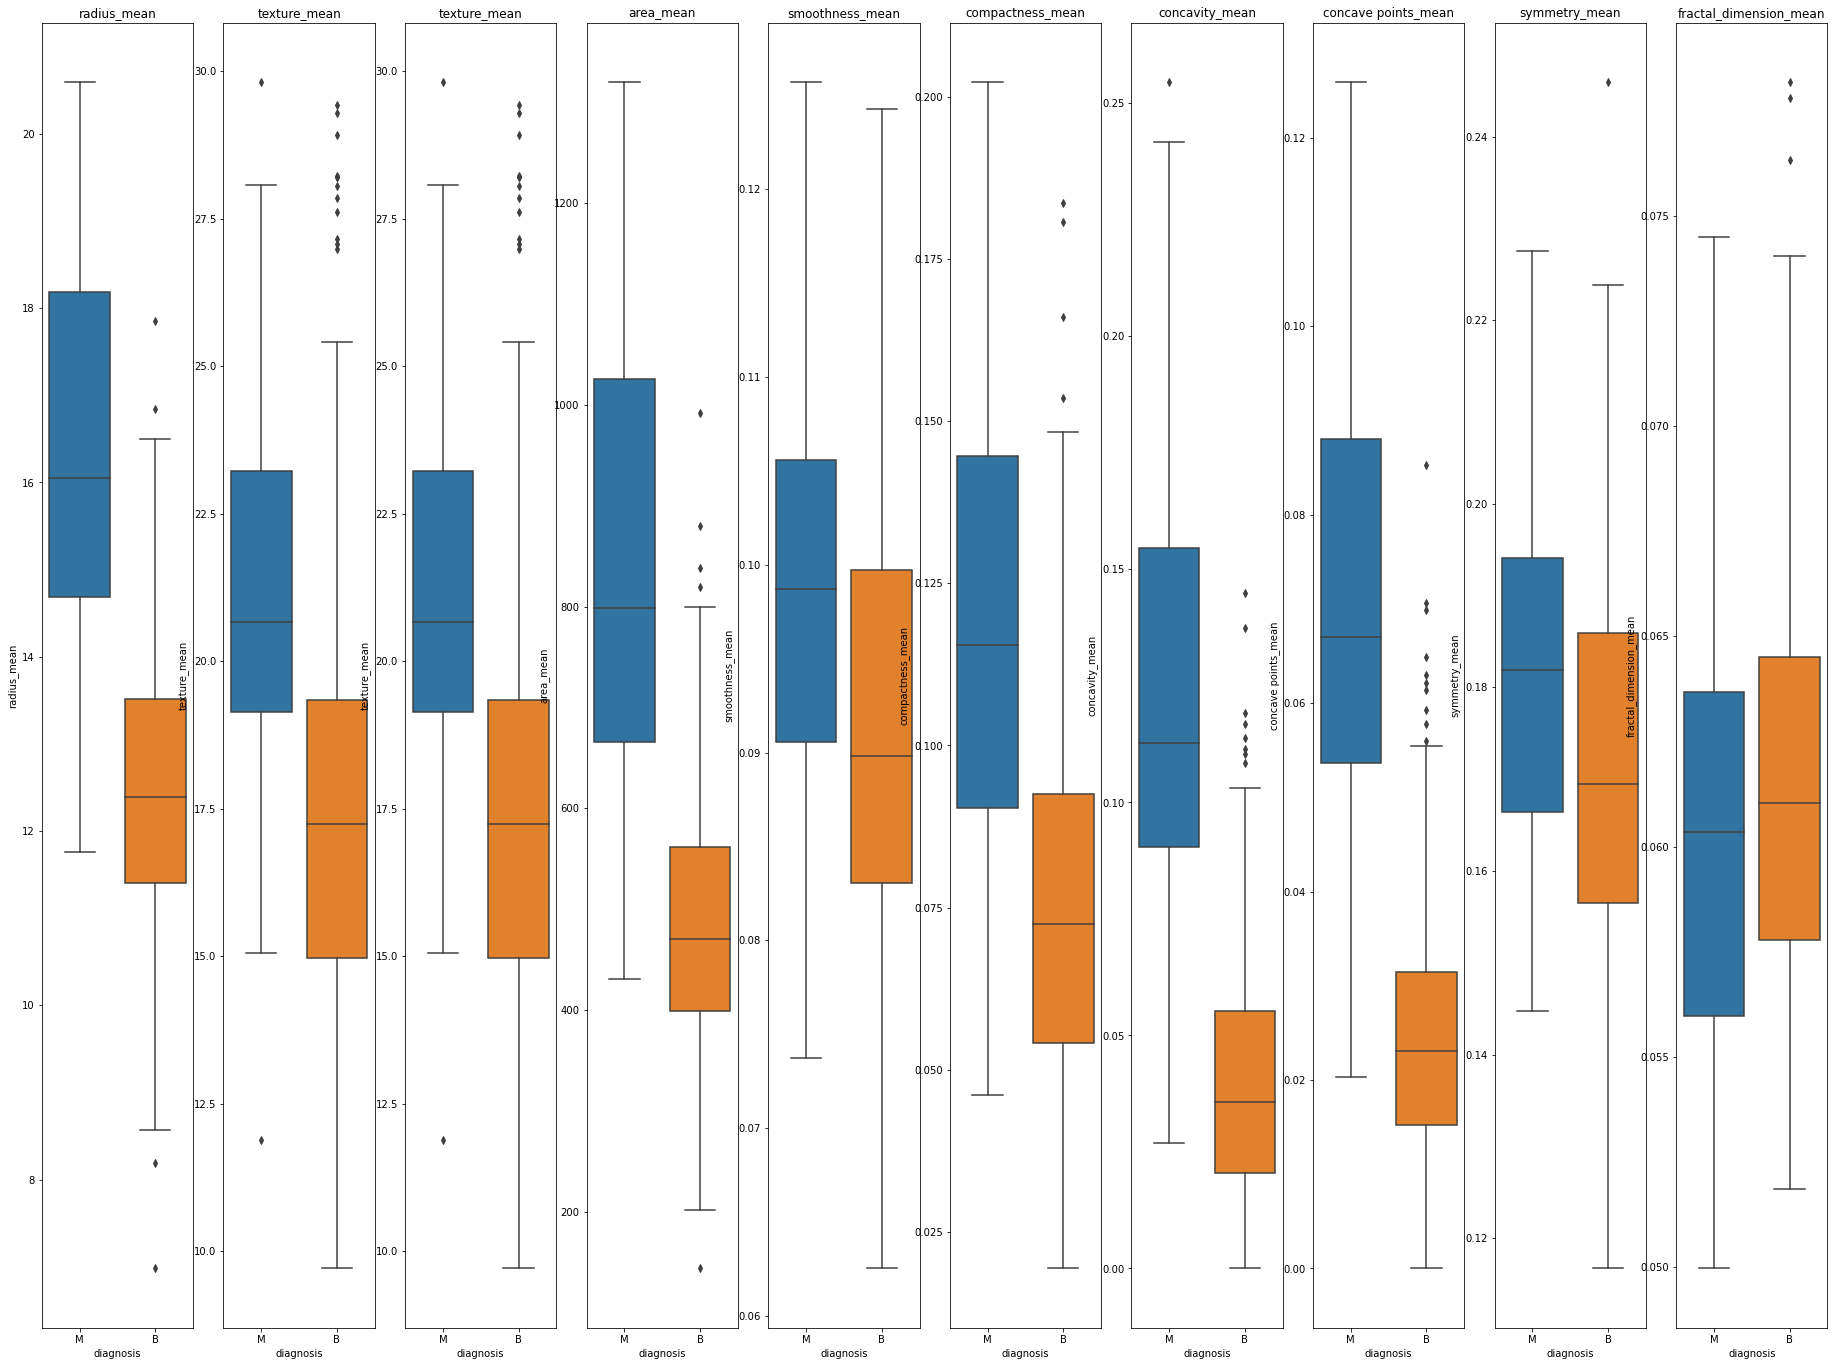

In [14]:
f, axes = plt.subplots(1, 10, figsize=(32, 24))
sns.boxplot(x=data_filtered['diagnosis'], y=data_filtered['radius_mean'], ax=axes[0])
axes[0].set_title('radius_mean') ;
sns.boxplot(x=data_filtered['diagnosis'], y=data_filtered['texture_mean'], ax=axes[1])
axes[1].set_title('texture_mean') ;
sns.boxplot(x=data_filtered['diagnosis'], y=data_filtered['texture_mean'], ax=axes[2])
axes[2].set_title('texture_mean') ;
sns.boxplot(x=data_filtered['diagnosis'], y=data_filtered['area_mean'], ax=axes[3])
axes[3].set_title('area_mean') ;
sns.boxplot(x=data_filtered['diagnosis'], y=data_filtered['smoothness_mean'], ax=axes[4])
axes[4].set_title('smoothness_mean') ;
sns.boxplot(x=data_filtered['diagnosis'], y=data_filtered['compactness_mean'], ax=axes[5])
axes[5].set_title('compactness_mean') ;
sns.boxplot(x=data_filtered['diagnosis'], y=data_filtered['concavity_mean'], ax=axes[6])
axes[6].set_title('concavity_mean') ;
sns.boxplot(x=data_filtered['diagnosis'], y=data_filtered['concave points_mean'], ax=axes[7])
axes[7].set_title('concave points_mean') ;
sns.boxplot(x=data_filtered['diagnosis'], y=data_filtered['symmetry_mean'], ax=axes[8])
axes[8].set_title('symmetry_mean') ;
sns.boxplot(x=data_filtered['diagnosis'], y=data_filtered['fractal_dimension_mean'], ax=axes[9])
axes[9].set_title('fractal_dimension_mean') ;

In [397]:
print (data_filtered['diagnosis'].value_counts())

B    300
M     98
Name: diagnosis, dtype: int64


In [15]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 6 to 566
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                398 non-null    object 
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

Supression des outliers selon le critère de tukey semble fonctionner car on observe moins de valeurs hors des "moustaches" sur le boxplot. Cependnat, elle implique de supprimier environ 30% des données, ce qui me semble être une proportion trop importante pour un modèle généralisable, donc je garde les l'ensemble du dataset.

Visualiser les variables d'intérêt

In [17]:
title = 'Nombre de tumeurs bégnines et malignes'
xlabel= 'Diagnostic'
ylabel= 'Nombre'

B    357
M    212
Name: diagnosis, dtype: int64


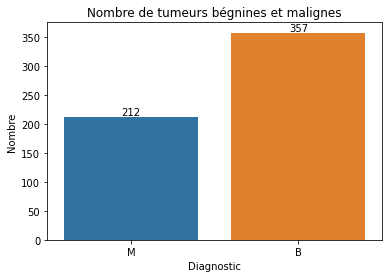

In [18]:
ax = sns.countplot(x='diagnosis', data=data )
ax.bar_label(ax.containers[0] )
ax.set_title(title)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
print (data['diagnosis'].value_counts())
#ajouter légende

Convertir en données numériques : tous déjà numérique (float) sauf diagnosis

In [19]:
labelencoder = LabelEncoder()
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])

In [20]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Aperçu de la distribution des données

In [22]:
title = 'Distribution des tumeurs malignes et bégnines selon le rayon moyen'
xlabel= 'Rayon moyen'
ylabel= 'Fréquence'

Text(0, 0.5, 'Fréquence')

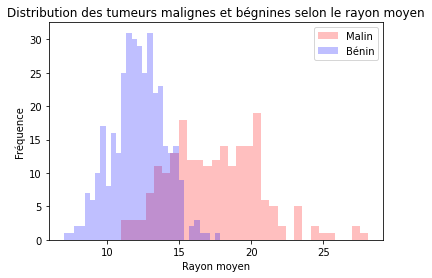

In [23]:
plt.hist(data[data["diagnosis"] == 1].radius_mean, bins=30,color='red', label='Malin',alpha=0.25)
plt.hist(data[data["diagnosis"] == 0].radius_mean, bins=30, color='blue', label='Bénin',alpha=0.25)
plt.legend()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

In [24]:
title = 'Distribution des tumeurs malignes et bégnines selon la texture moyenne'
xlabel= 'Texture moyenne'
ylabel= 'Fréquence'

Text(0, 0.5, 'Fréquence')

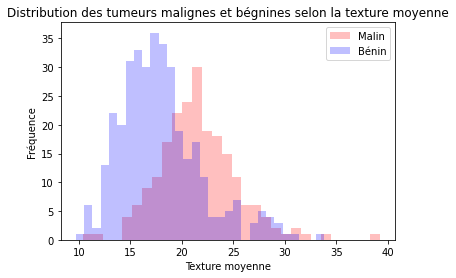

In [25]:
plt.hist(data[data["diagnosis"] == 1].texture_mean, bins=30,color='red', label='Malin',alpha=0.25)
plt.hist(data[data["diagnosis"] == 0].texture_mean, bins=30, color='blue', label='Bénin',alpha=0.25)
plt.legend()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

In [26]:
#correlation : relations entre les variables
corr= data.corr()

In [27]:
title = 'Matrice des correlations représentant la force des interactions entre les features'

<AxesSubplot:title={'center':'Matrice des correlations représentant la force des interactions entre les features'}>

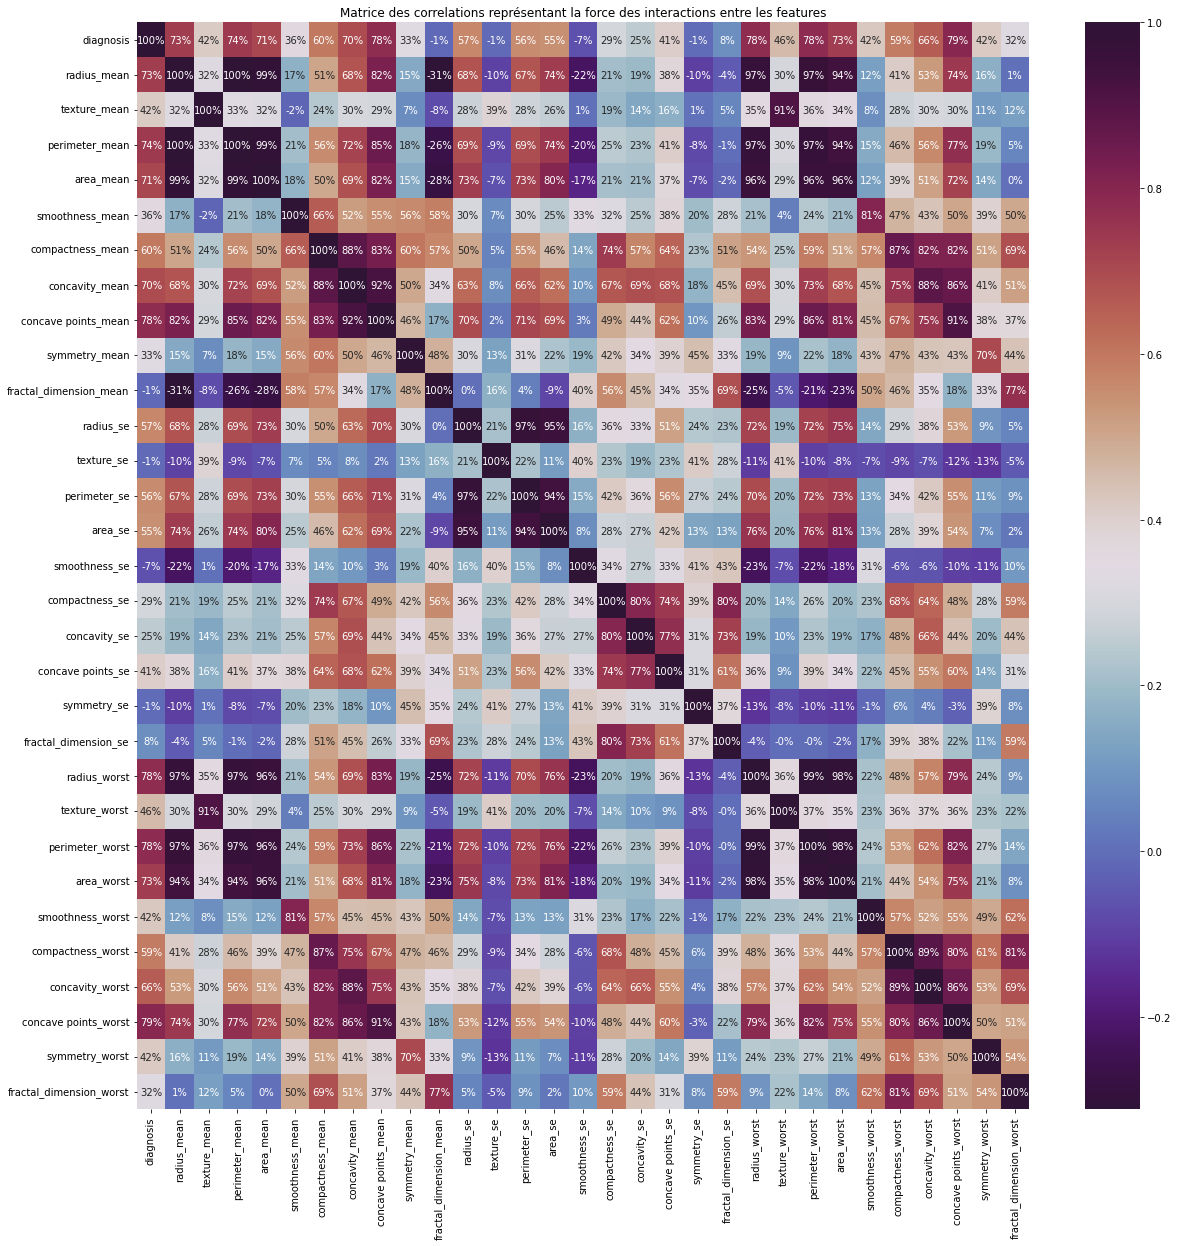

In [28]:
f, ax=plt.subplots(figsize=(20,20))
ax.set_title(title)
sns.heatmap(corr,fmt=".0%", annot=True, cmap = 'twilight_shifted')
#.1f

Certaines features sont très corrélées : radius, perimeter et area entre eux ainsi que compactness, concavity et concave points entre eux.

Séparation des features et des étiquettes

In [386]:
y = data['diagnosis']
X = data.drop('diagnosis', axis=1)

Séparation du jeu de données en jeu d'entrainement et jeu de test

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Distribution des 10 premières features

Text(0.5, 1.0, 'Distribution des 10 premier features')

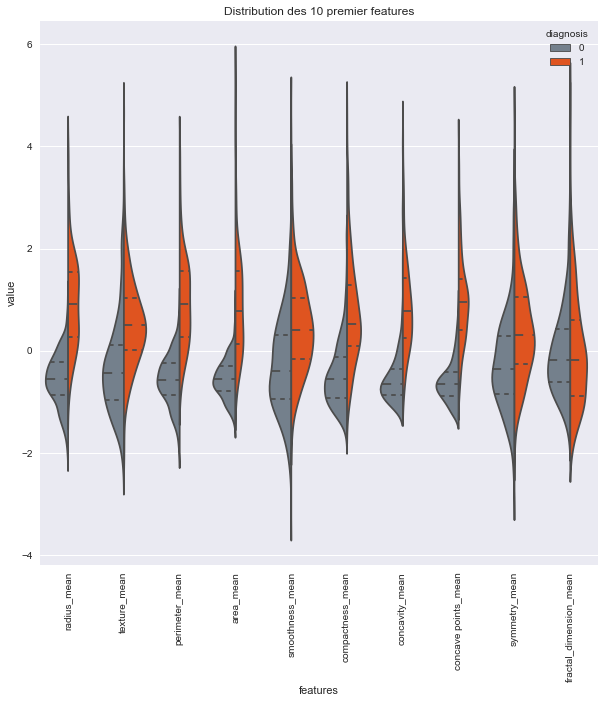

In [396]:
#https://github.com/chriskhanhtran/predict-breast-cancer-with-rf-pca-svm/blob/master/breast-cancer.ipynb
#https://medium.com/swlh/breast-cancer-classification-using-python-e83719e5f97d
Colors = ['#708090', '#FF4500']
data_dia = y
data1 = X
data_n_2 = (data1 - data1.mean()) / (data1.std())              # standardization
data1 = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data1 = pd.melt(data1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data1,split=True, inner="quart",  palette={0 : Colors[0], 1 : Colors[1]})
plt.xticks(rotation=90)
plt.title('Distribution des 10 premier features')

Scaling des données

L'observation des statistiques descriptives données par la fonction describe montre notamment que les ordres de grandeur des features sont parfois très différents donc suggère qu'il est pertinent de procéder à une "mise à l'échelle" (scaling) des données pour que celles-ci soient comparables. Il existe plusieurs méthodes de scaling, qui sont testées ci-après.

In [31]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

https://gtraskas.github.io/post/breast_cancer/

Standard scaler

In [32]:
sc = StandardScaler()
X_train_standardscale = sc.fit_transform(X_train)
X_test_standardscale = sc.transform(X_test)

Robust scaler

In [33]:
rsc = RobustScaler()
X_train_robustscale = rsc.fit_transform(X_train)
X_test_robustscale = rsc.transform(X_test)

MinMaxScaler

In [34]:
mmsc = MinMaxScaler()
X_train_minmaxscale = mmsc.fit_transform(X_train)
X_test_minmaxscale = mmsc.transform(X_test)

MaxAbsScaler

In [35]:
masc = MaxAbsScaler()
X_train_maxabsscale = masc.fit_transform(X_train)
X_test_maxabsscale = masc.transform(X_test)

**Modèles directement interprétables**
* Régression logistique

In [36]:
#Grid search pour optimiser les hyperparamètres

In [37]:
#https://medium.com/swlh/breast-cancer-detection-using-logistic-regression-7bef0110aff5
#https://www.kaggle.com/code/enespolat/grid-search-with-logistic-regression/notebook

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'solver' :['newton-cg', 'lbfgs', 'liblinear'], 'fit_intercept':[True, False]}
logreg=LogisticRegression(max_iter=3000)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("best parameters : ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

best parameters :  {'C': 100.0, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.9670531400966184


In [41]:
#Sans scaling
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(C= 100.0, fit_intercept= True, penalty= 'l2', solver= 'newton-cg', max_iter=3000)
lr = logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

Accuracy score = 0.956140350877193
y_test shape = (114,)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix =  [[70  1]
 [ 4 39]]


<AxesSubplot:>

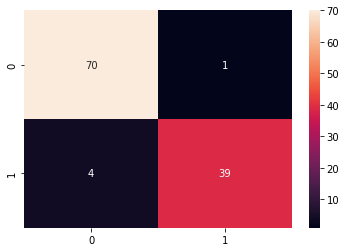

In [42]:
print('Accuracy score =', accuracy_score(y_test, y_pred))
print('y_test shape =', y_test.shape)
print(classification_report(y_test, y_pred))
LR_confusion_matrix = confusion_matrix(y_test, y_pred)
print ('Confusion matrix = ', LR_confusion_matrix)
sns.heatmap(LR_confusion_matrix, annot=True)

In [43]:
#cross validation score d'accuracy
scores = cross_val_score(logistic_regression, X, y, cv=10)
print ('Cross validation - Régression logistique :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Régression logistique :
scores =  [0.96491228 0.94736842 0.92982456 0.96491228 0.96491228 1.
 0.96491228 0.96491228 0.98245614 0.96428571]
score moyen = 0.9648496240601503


In [44]:
#cross validation_score de recall
recall_scores = cross_val_score(logistic_regression, X, y,scoring='recall' , cv=10)
print ('Cross validation - Régression logistique :')
print('scores de recall = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - Régression logistique :
scores de recall =  [0.95454545 0.90909091 0.80952381 0.95238095 0.95238095 1.
 0.95238095 0.95238095 1.         0.95238095]
score recall moyen = 0.9435064935064934
score recall std = 0.05102397806142295


In [45]:
#Stantard Scaler
#Grid search
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'solver' :['newton-cg', 'lbfgs', 'liblinear'], 'fit_intercept':[True, False]}
logreg=LogisticRegression(max_iter=3000)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_standardscale,y_train)

print("best parameters : ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

best parameters :  {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.9802415458937197


In [398]:
logistic_regression = LogisticRegression(C=0.1, fit_intercept=True, penalty= 'l2', solver='liblinear', max_iter=3000)
lr = logistic_regression.fit(X_train_standardscale, y_train)
y_pred = logistic_regression.predict(X_test_standardscale)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [399]:
print('Accuracy score =', accuracy_score(y_test, y_pred))

Accuracy score = 0.9912280701754386


y_test shape = (114,)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion matrix = [[71  0]
 [ 1 42]]


<AxesSubplot:>

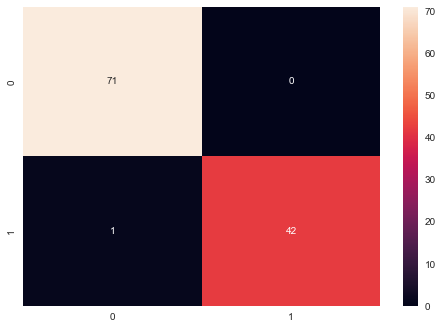

In [400]:
print('y_test shape =', y_test.shape)
print(classification_report(y_test, y_pred))
LR_confusion_matrix = confusion_matrix(y_test, y_pred)
print ('Confusion matrix =', LR_confusion_matrix)
sns.heatmap(LR_confusion_matrix, annot=True)

In [401]:
scores = cross_val_score(lr, X, y, cv=10)
print ('Cross validation - Régression logistique :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))
print('score std =', np.std(scores))

Cross validation - Régression logistique :
scores =  [0.92982456 0.92982456 0.94736842 0.92982456 0.98245614 0.98245614
 0.94736842 0.89473684 0.92982456 0.96428571]
score moyen = 0.9437969924812029
score std = 0.025733579286753797


In [402]:
#crossval recall
recall_scores = cross_val_score(lr, X, y,scoring='recall' , cv=10)
print ('Cross validation - Régression logistique :')
print('scores de recall = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - Régression logistique :
scores de recall =  [0.86363636 0.81818182 0.9047619  0.9047619  0.95238095 0.95238095
 0.9047619  0.80952381 0.95238095 0.95238095]
score recall moyen = 0.9015151515151516
score recall std = 0.05217527865550102


In [51]:
#Robustscaler
#Grid search
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'solver' :['newton-cg', 'lbfgs', 'liblinear'], 'fit_intercept':[True, False]}
logreg=LogisticRegression(max_iter=3000)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_robustscale,y_train)

print("best parameters : ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

best parameters :  {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.9802415458937197


In [52]:
logistic_regression = LogisticRegression(C=0.1, fit_intercept=True, penalty= 'l2', solver='liblinear', max_iter=3000)
lr = logistic_regression.fit(X_train_robustscale, y_train)
y_pred = logistic_regression.predict(X_test_robustscale)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [53]:
print('Accuracy score =', accuracy_score(y_test, y_pred))

Accuracy score = 0.9912280701754386


y_test shape = (114,)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion matrix = [[71  0]
 [ 1 42]]


<AxesSubplot:>

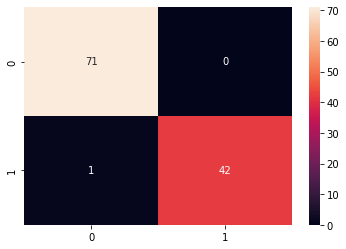

In [54]:
print('y_test shape =', y_test.shape)
print(classification_report(y_test, y_pred))
LR_confusion_matrix = confusion_matrix(y_test, y_pred)
print ('Confusion matrix =', LR_confusion_matrix)
sns.heatmap(LR_confusion_matrix, annot=True)

In [55]:
scores = cross_val_score(logistic_regression, X, y, cv=10)
print ('Cross validation - Régression logistique :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Régression logistique :
scores =  [0.92982456 0.92982456 0.94736842 0.92982456 0.98245614 0.98245614
 0.94736842 0.89473684 0.92982456 0.96428571]
score moyen = 0.9437969924812029


In [56]:
recall_scores = cross_val_score(logistic_regression, X, y,scoring='recall' , cv=5)
print ('Cross validation - Régression logistique :')
print('scores de recall= ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - Régression logistique :
scores de recall=  [0.8372093  0.90697674 0.95238095 0.88095238 0.95238095]
score recall moyen = 0.9059800664451826
score recall std = 0.04396107559304748


In [57]:
#MinMaxScaler
#Grid search
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'solver' :['newton-cg', 'lbfgs', 'liblinear'], 'fit_intercept':[True, False]}
logreg=LogisticRegression(max_iter=3000)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_minmaxscale,y_train)

print("best parameters : ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

best parameters :  {'C': 10.0, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.9757971014492753


In [58]:
logistic_regression = LogisticRegression(C=10, fit_intercept=True, penalty= 'l2', solver='newton-cg', max_iter=3000)
lr = logistic_regression.fit(X_train_minmaxscale, y_train)
y_pred = logistic_regression.predict(X_test_minmaxscale)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

Accuracy score =  0.9736842105263158
y_test shape =  (114,)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix = [[70  1]
 [ 2 41]]


<AxesSubplot:>

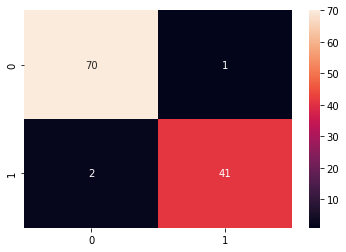

In [59]:
print('Accuracy score = ' , accuracy_score(y_test, y_pred))
print('y_test shape = ', y_test.shape)
print(classification_report(y_test, y_pred))
LR_confusion_matrix = confusion_matrix(y_test, y_pred)
print ('Confusion matrix =', LR_confusion_matrix)
sns.heatmap(LR_confusion_matrix, annot=True)

In [60]:
scores = cross_val_score(lr, X, y, cv=10)
print ('Cross validation - Régression logistique :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Régression logistique :
scores =  [0.98245614 0.9122807  0.92982456 0.94736842 0.96491228 1.
 0.94736842 0.94736842 0.96491228 0.96428571]
score moyen = 0.9560776942355889


In [61]:
recall_scores = cross_val_score(logistic_regression, X, y,scoring='recall' , cv=10)
print ('Cross validation - Régression logistique :')
print('scores de recall = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - Régression logistique :
scores de recall =  [0.95454545 0.81818182 0.80952381 0.9047619  0.95238095 1.
 0.95238095 0.95238095 1.         0.95238095]
score recall moyen = 0.9296536796536797
score recall std = 0.06329272295213763


In [62]:
#MaxAbsScaler
#Grid search
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'solver' :['newton-cg', 'lbfgs', 'liblinear'], 'fit_intercept':[True, False]}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=3000)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_maxabsscale,y_train)

print("best parameters : ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

best parameters :  {'C': 10.0, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.9780193236714976


In [63]:
logistic_regression = LogisticRegression(C=10.0, fit_intercept=True, penalty='l2', solver='newton-cg', max_iter=3000)
lr = logistic_regression.fit(X_train_maxabsscale, y_train)
y_pred = logistic_regression.predict(X_test_maxabsscale)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

Accuracy score =  0.9736842105263158
y_test shape =  (114,)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix =  [[70  1]
 [ 2 41]]


<AxesSubplot:>

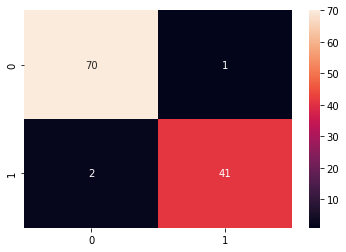

In [64]:
print('Accuracy score = ' , accuracy_score(y_test, y_pred))
print('y_test shape = ', y_test.shape)
print(classification_report(y_test, y_pred))
LR_confusion_matrix = confusion_matrix(y_test, y_pred)
print ('Confusion matrix = ', LR_confusion_matrix)
sns.heatmap(LR_confusion_matrix, annot=True)

In [65]:
scores = cross_val_score(logistic_regression, X, y, cv=10)
print ('Cross validation - Régression logistique :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Régression logistique :
scores =  [0.98245614 0.9122807  0.92982456 0.94736842 0.96491228 1.
 0.94736842 0.94736842 0.96491228 0.96428571]
score moyen = 0.9560776942355889


In [66]:
recall_scores = cross_val_score(logistic_regression, X, y,scoring='recall' , cv=10)
print ('Cross validation - Régression logistique :')
print('scores de recall = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - Régression logistique :
scores de recall =  [0.95454545 0.81818182 0.80952381 0.9047619  0.95238095 1.
 0.95238095 0.95238095 1.         0.95238095]
score recall moyen = 0.9296536796536797
score recall std = 0.06329272295213763


* Arbre de décision

In [149]:
#sans scaling
#grid search
tree_classifier=DecisionTreeClassifier()
tree_classifier_parameters = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 15))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_classifier = GridSearchCV(tree_classifier, tree_classifier_parameters, scoring="accuracy", n_jobs=-1, cv=5)
tree_classifier.fit(X_train, y_train)
tree_best_parameters = tree_classifier.best_params_
print(f"Best paramters: {tree_best_parameters})")

Best paramters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 4, 'splitter': 'random'})


In [150]:
decision_tree = DecisionTreeClassifier(criterion= 'gini', max_depth = 7, min_samples_leaf=5, min_samples_split= 4, splitter= 'random')
decision_tree.fit(X_train, y_train)
tree_prediction = decision_tree.predict(X_test)
y_val = decision_tree.predict(X_train)
accuracy_score(y_train, y_val)

0.9604395604395605

In [151]:
decision_tree.score(X_test,y_test)

0.9736842105263158

In [152]:
accuracy_score(y_test, tree_prediction)

0.9736842105263158

In [153]:
print(classification_report(y_test, tree_prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



[[71  0]
 [ 3 40]]


<AxesSubplot:>

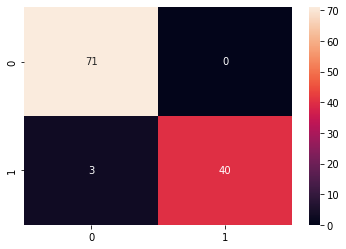

In [154]:
DT_confusion_matrix = confusion_matrix(y_test, tree_prediction)
print (DT_confusion_matrix)
sns.heatmap(DT_confusion_matrix, annot=True)

In [155]:
scores = cross_val_score(decision_tree, X, y, cv=10)
print ('Cross validation - Arbre de décision :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Arbre de décision :
scores =  [0.94736842 0.80701754 0.92982456 0.92982456 0.94736842 0.94736842
 0.9122807  0.96491228 0.94736842 0.94642857]
score moyen = 0.9279761904761903


In [156]:
recall_scores = cross_val_score(decision_tree, X, y, scoring='recall' , cv=10)
print ('Cross validation - Arbre de décision :')
print('scores de recall = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - Arbre de décision :
scores de recall =  [0.90909091 0.77272727 0.9047619  0.85714286 0.9047619  1.
 0.85714286 1.         0.95238095 0.9047619 ]
score recall moyen = 0.9062770562770563
score recall std = 0.06509396143380655


In [134]:
#Standard Scaler
#grid search
tree_classifier=DecisionTreeClassifier()
tree_classifier_parameters = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 15))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_classifier = GridSearchCV(tree_classifier, tree_classifier_parameters, scoring="accuracy", n_jobs=-1, cv=5)
tree_classifier.fit(X_train_standardscale, y_train)
tree_best_parameters = tree_classifier.best_params_
print(f"Best paramters: {tree_best_parameters})")

Best paramters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'})


In [416]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=6, min_samples_leaf= 5, min_samples_split= 2, splitter= 'random')
decision_tree.fit(X_train_standardscale, y_train)
tree_prediction = decision_tree.predict(X_test_standardscale)
y_val = decision_tree.predict(X_train_standardscale)
accuracy_score(y_train, y_val)

0.9626373626373627

In [417]:
accuracy_score(y_test, tree_prediction)

0.9649122807017544

In [418]:
print(classification_report(y_test, tree_prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



Confusion matrix = [[71  0]
 [ 4 39]]


<AxesSubplot:>

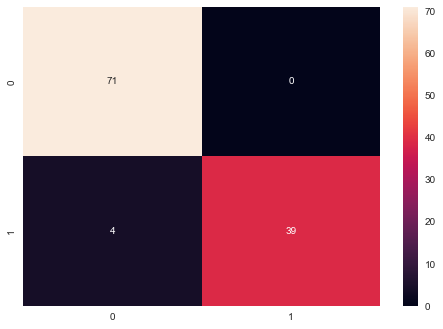

In [419]:
DT_confusion_matrix = confusion_matrix(y_test, tree_prediction)
print ('Confusion matrix =', DT_confusion_matrix)
sns.heatmap(DT_confusion_matrix, annot=True)

In [420]:
scores = cross_val_score(decision_tree, X, y, cv=10)
print ('Cross validation - Arbre de décision :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))
print('score std =', np.std(scores))

Cross validation - Arbre de décision :
scores =  [0.9122807  0.84210526 0.96491228 0.92982456 0.98245614 0.92982456
 0.9122807  0.98245614 0.92982456 0.91071429]
score moyen = 0.9296679197994988
score std = 0.039302062069330276


In [421]:
recall_scores = cross_val_score(decision_tree, X, y, scoring='recall' , cv=10)
print ('Cross validation - Arbre de décision :')
print('scores de recall = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - Arbre de décision :
scores de recall =  [0.95454545 0.86363636 0.9047619  0.85714286 0.95238095 0.9047619
 0.9047619  0.95238095 0.9047619  1.        ]
score recall moyen = 0.91991341991342
score recall std = 0.04212724026217442


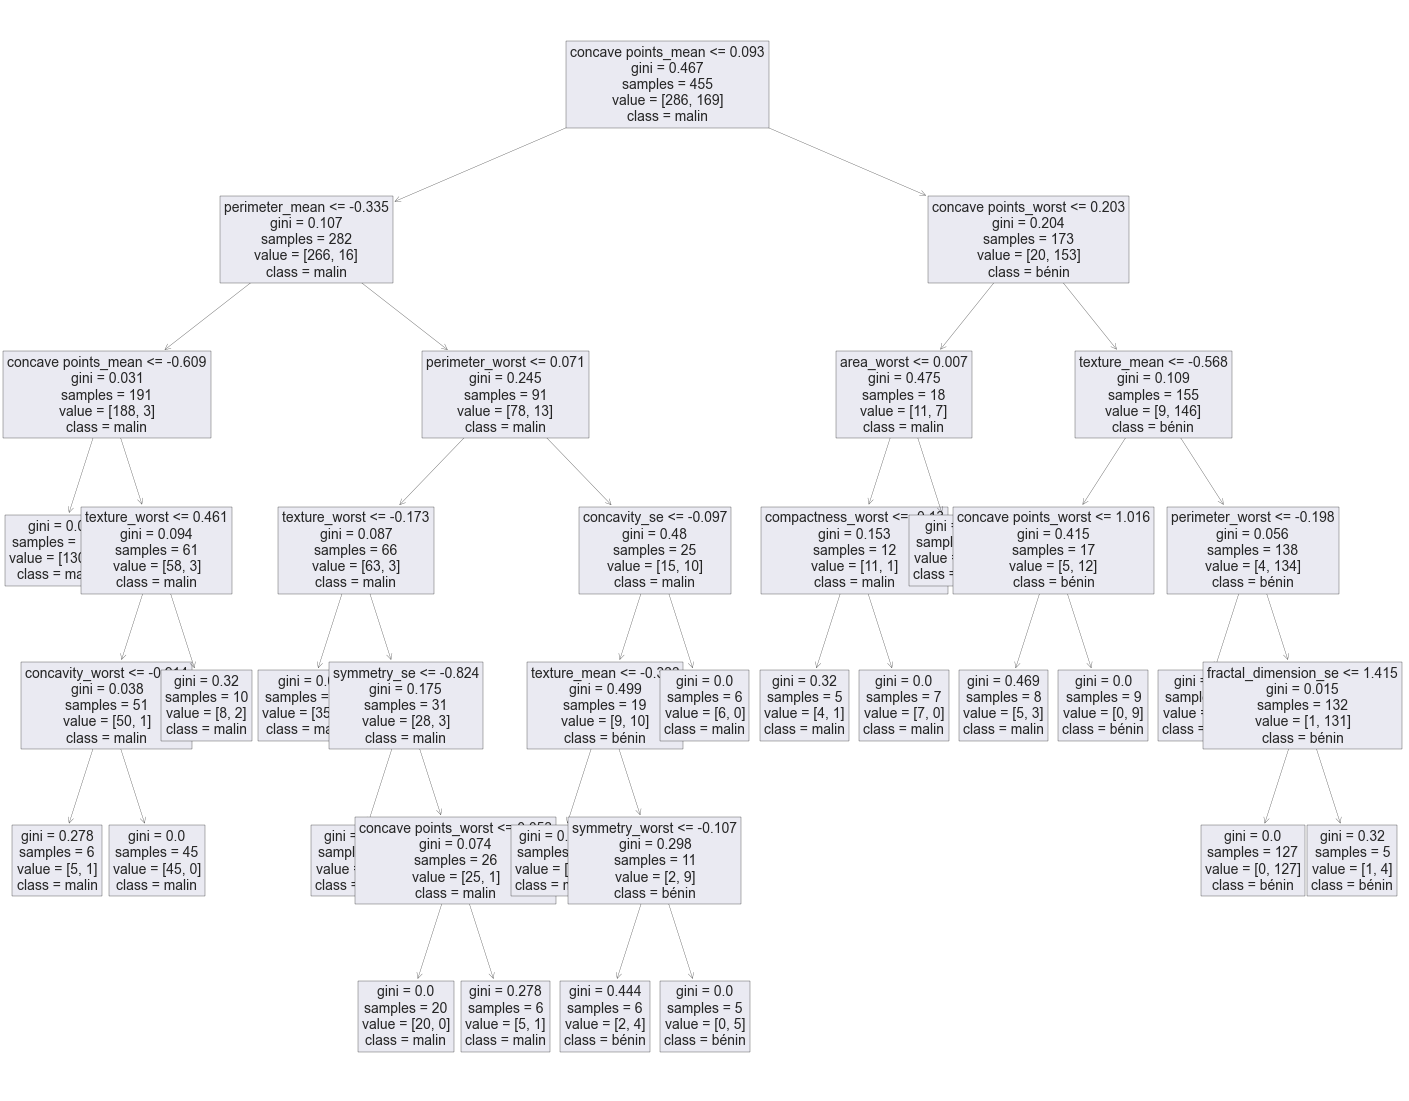

In [422]:
from sklearn import tree
_ = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(decision_tree,
                   feature_names =  X.columns,
                   class_names = ['malin', 'bénin'],
                   filled = False,
                   fontsize = 14)

In [409]:
#Robust Scaler
#grid search
tree_classifier=DecisionTreeClassifier()
tree_classifier_parameters = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 15))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_classifier = GridSearchCV(tree_classifier, tree_classifier_parameters, scoring="accuracy", n_jobs=-1, cv=5)
tree_classifier.fit(X_train_robustscale, y_train)
tree_best_parameters = tree_classifier.best_params_
print(f"Best paramters: {tree_best_parameters})")

Best paramters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'})


In [410]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=6, min_samples_leaf= 5, min_samples_split= 2, splitter= 'random')
decision_tree.fit(X_train_standardscale, y_train)
tree_prediction = decision_tree.predict(X_test_robustscale)
y_val = decision_tree.predict(X_train_robustscale)
accuracy_score(y_train, y_val)

0.9252747252747253

In [411]:
accuracy_score(y_test, tree_prediction)

0.9210526315789473

In [412]:
print(classification_report(y_test, tree_prediction))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        71
           1       0.84      0.98      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



Confusion matrix = [[63  8]
 [ 1 42]]


<AxesSubplot:>

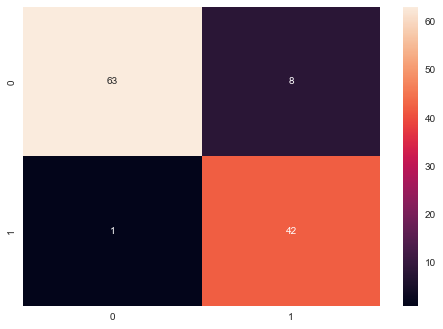

In [413]:
DT_confusion_matrix = confusion_matrix(y_test, tree_prediction)
print ('Confusion matrix =', DT_confusion_matrix)
sns.heatmap(DT_confusion_matrix, annot=True)

In [414]:
scores = cross_val_score(decision_tree, X, y, cv=10)
print ('Cross validation - Arbre de décision :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Arbre de décision :
scores =  [0.92982456 0.94736842 0.94736842 0.9122807  0.98245614 0.96491228
 0.94736842 0.96491228 0.94736842 0.94642857]
score moyen = 0.9490288220551377


In [415]:
recall_scores = cross_val_score(decision_tree, X, y, scoring='recall' , cv=10)
print ('Cross validation - Arbre de décision :')
print('scores de recall = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - Arbre de décision :
scores de recall =  [0.95454545 0.86363636 0.71428571 0.95238095 0.9047619  1.
 0.85714286 0.9047619  0.95238095 0.9047619 ]
score recall moyen = 0.9008658008658008
score recall std = 0.07494805582372718


In [127]:
#MinMaxScaler
#grid search
tree_classifier=DecisionTreeClassifier()
tree_classifier_parameters = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 15))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_classifier = GridSearchCV(tree_classifier, tree_classifier_parameters, scoring="accuracy", n_jobs=-1, cv=5)
tree_classifier.fit(X_train_minmaxscale, y_train)
tree_best_parameters = tree_classifier.best_params_
print(f"Best paramters: {tree_best_parameters})")

Best paramters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'})


In [128]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth= 10, min_samples_leaf= 5, min_samples_split= 2, splitter= 'random')
decision_tree.fit(X_train_minmaxscale, y_train)
tree_prediction = decision_tree.predict(X_test_minmaxscale)
y_val = decision_tree.predict(X_train_minmaxscale)
accuracy_score(y_train, y_val)

0.9802197802197802

In [129]:
accuracy_score(y_test, tree_prediction)

0.956140350877193

In [130]:
print(classification_report(y_test, tree_prediction))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Confusion matrix = [[67  4]
 [ 1 42]]


<AxesSubplot:>

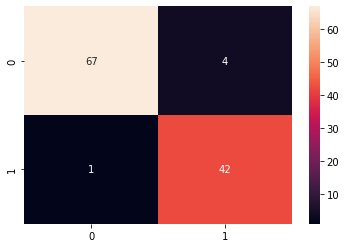

In [131]:
DT_confusion_matrix = confusion_matrix(y_test, tree_prediction)
print ('Confusion matrix =', DT_confusion_matrix)
sns.heatmap(DT_confusion_matrix, annot=True)

In [132]:
scores = cross_val_score(decision_tree, X, y, cv=10)
print ('Cross validation - Arbre de décision :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Arbre de décision :
scores =  [0.92982456 0.9122807  0.94736842 0.9122807  0.98245614 0.96491228
 0.94736842 0.96491228 0.89473684 0.91071429]
score moyen = 0.936685463659148


In [133]:
recall_scores = cross_val_score(decision_tree, X, y, scoring='recall' , cv=10)
print ('Cross validation - Arbre de décision :')
print('scores = ', scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - Arbre de décision :
scores =  [0.92982456 0.9122807  0.94736842 0.9122807  0.98245614 0.96491228
 0.94736842 0.96491228 0.89473684 0.91071429]
score recall moyen = 0.8915584415584416
score recall std = 0.036840437270162514


In [141]:
#MaxAbsScaler
#grid search
tree_classifier=DecisionTreeClassifier()
tree_classifier_parameters = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 15))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_classifier = GridSearchCV(tree_classifier, tree_classifier_parameters, scoring="accuracy", n_jobs=-1, cv=5) # fixer la seed
tree_classifier.fit(X_train_maxabsscale, y_train)
tree_best_parameters = tree_classifier.best_params_
print(f"Best paramters: {tree_best_parameters})")

Best paramters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'})


In [142]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth= 9, min_samples_leaf= 1, min_samples_split= 4, splitter= 'random')
decision_tree.fit(X_train_maxabsscale, y_train)
tree_prediction = decision_tree.predict(X_test_maxabsscale)
y_val = decision_tree.predict(X_train_maxabsscale)
accuracy_score(y_train, y_val)

0.9912087912087912

In [143]:
accuracy_score(y_test, tree_prediction)

0.9298245614035088

In [144]:
print(classification_report(y_test, tree_prediction))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



Confusion matrix = [[68  3]
 [ 5 38]]


<AxesSubplot:>

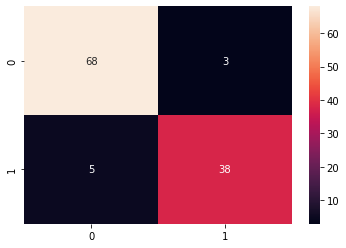

In [145]:
DT_confusion_matrix = confusion_matrix(y_test, tree_prediction)
print ('Confusion matrix =', DT_confusion_matrix)
sns.heatmap(DT_confusion_matrix, annot=True)

In [146]:
scores = cross_val_score(decision_tree, X, y, cv=10)
print ('Cross validation - Arbre de décision :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Arbre de décision :
scores =  [0.96491228 0.89473684 0.89473684 0.87719298 0.96491228 0.96491228
 0.96491228 0.94736842 0.92982456 0.96428571]
score moyen = 0.9367794486215539


In [147]:
recall_scores = cross_val_score(decision_tree, X, y, scoring='recall' , cv=10)
print ('Cross validation - Arbre de décision :')
print('scores de recall = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - Arbre de décision :
scores de recall =  [1.         0.86363636 0.85714286 0.85714286 0.95238095 0.9047619
 0.80952381 0.95238095 0.9047619  0.85714286]
score recall moyen = 0.895887445887446
score recall std = 0.055120058036626354


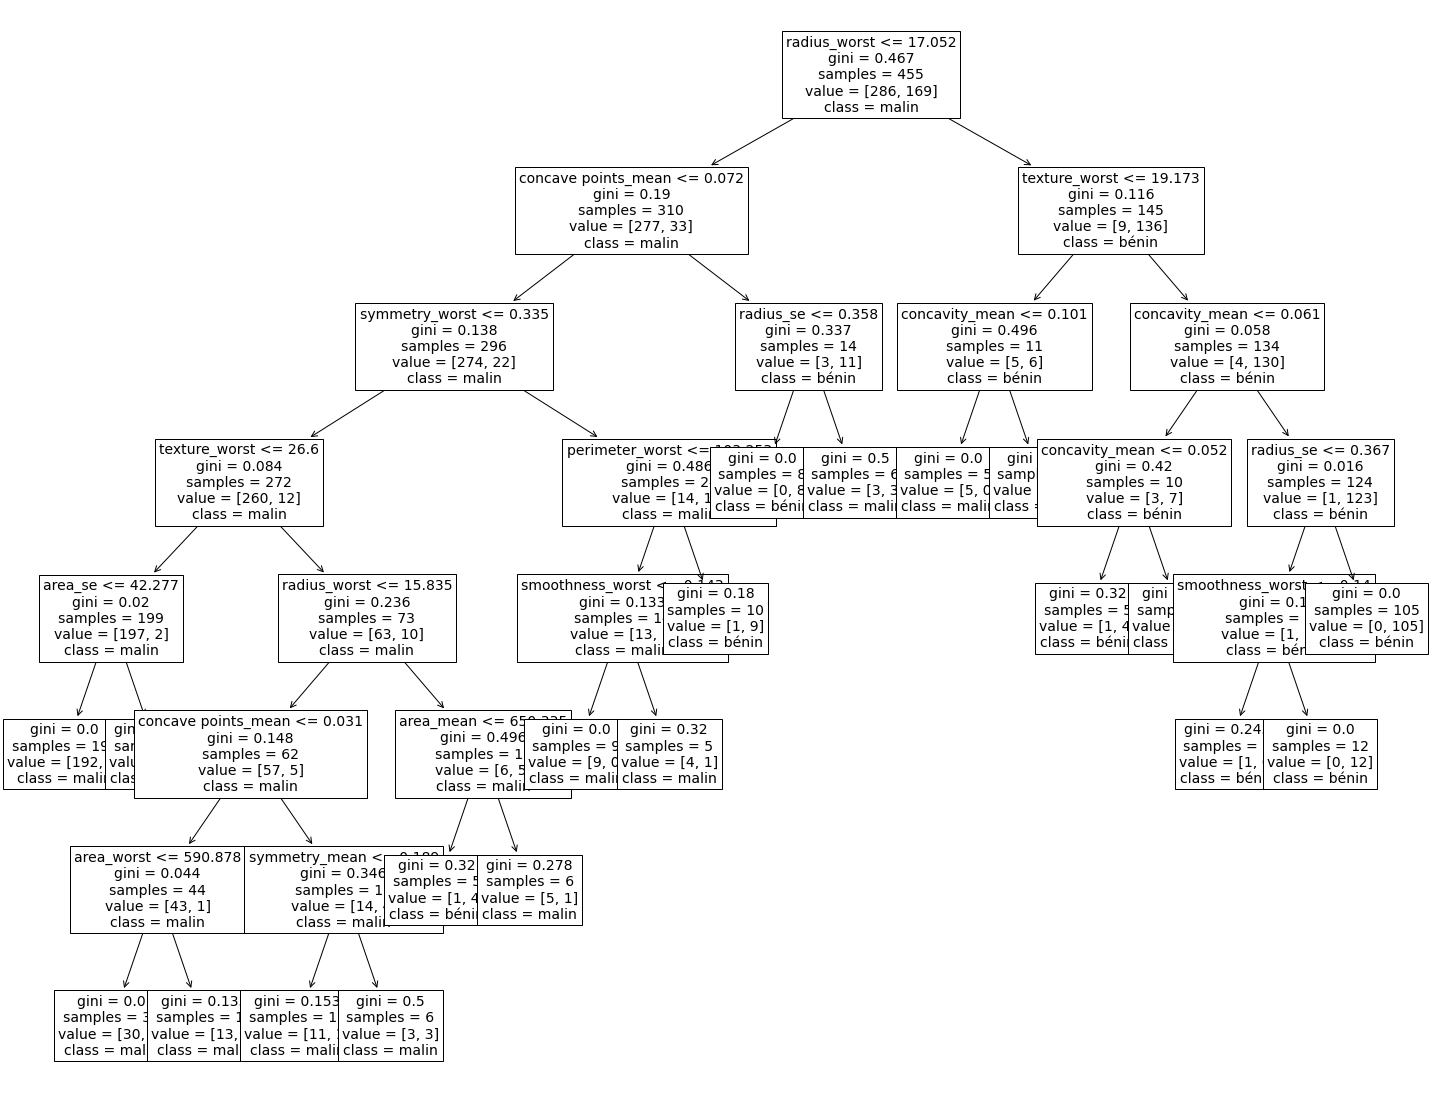

In [157]:
from sklearn import tree
_ = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(decision_tree,
                   feature_names =  X.columns,
                   class_names = ['malin', 'bénin'],
                   filled = False,
                   fontsize = 14)

**Modèles non directement interprétables**

Nous avons vu que certaines features sont très corrélées. Donc il peut être intéressant d'essayer d'en réduire leur nombre en utilisant une analyse en composante principales (PCA), qui cela dit diminue l'interprétabilité, qui était l'un des avantages des deux analyses précédentes. Maintenant utilisons des méthodes non interprétables directement pour voir si on peut améliorer les scores, notamment le recall pour limiter le faux négatif : Recall = vrai positifs/(vrais positifs + faux négatifs)

- PCA

Réduction de dimensions en transformant les données en deux nouvelles features qui expliquent le mieux la variance des données, afin de faciliter la représentation des données. Perte d'interprétabilité directe dans cette représentation.

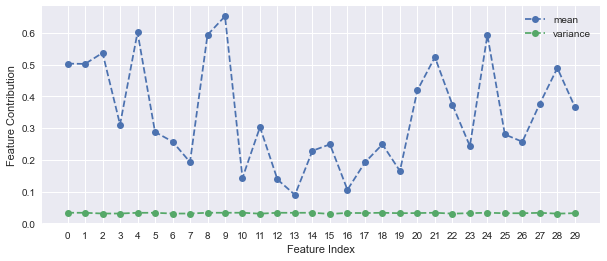

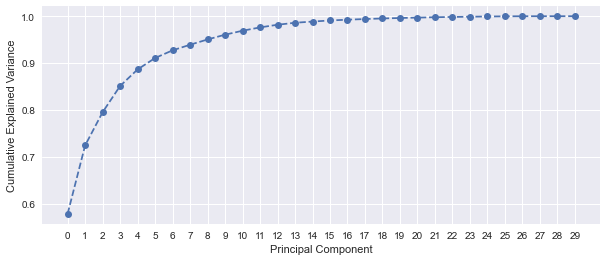

In [158]:
#https://gtraskas.github.io/post/breast_cancer/
from sklearn.decomposition import PCA
X_scaled = masc.fit_transform(X)

pca = PCA(30)
projected = pca.fit_transform(X_scaled)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plt.style.use('seaborn')

def plot_pca():
    plt.figure(figsize=(10, 4))
    plt.plot(pca_inversed_data.mean(axis=0), '--o', label = 'mean')
    plt.plot(np.square(pca_inversed_data.std(axis=0)), '--o', label = 'variance')
    plt.ylabel('Feature Contribution')
    plt.xlabel('Feature Index')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

    plt.figure(figsize = (10, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

plot_pca()

Ainsi transformés, 6 features suffisent à expliquer 90% de la variance

In [159]:
pca = PCA(n_components=6)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

* Random forest classifier

In [160]:
#Sans scaling

In [161]:
#Grid search 
RF=RandomForestClassifier()
RF_parameters = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'], 
}

RF = GridSearchCV(RF, RF_parameters, scoring="accuracy", cv=5)
RF.fit(X_train, y_train)
RF_best_parameters = RF.best_params_
print(f"Best paramters: {RF_best_parameters})")

Best paramters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 500})


In [374]:
RandomForest = RandomForestClassifier(criterion = 'entropy', max_depth= 7, max_features= 'log2', n_estimators= 500)
RandomForest.fit(X_train, y_train)
RandomForest_prediction = RandomForest.predict(X_test)
y_val = RandomForest.predict(X_train)
accuracy_score(y_train, y_val)

1.0

In [375]:
accuracy_score(y_test, RandomForest_prediction)

0.9649122807017544

In [376]:
print(classification_report(y_test, RandomForest_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [377]:
RF_confusion_matrix = confusion_matrix(y_test, RandomForest_prediction)
print(RF_confusion_matrix)

[[70  1]
 [ 3 40]]


<AxesSubplot:>

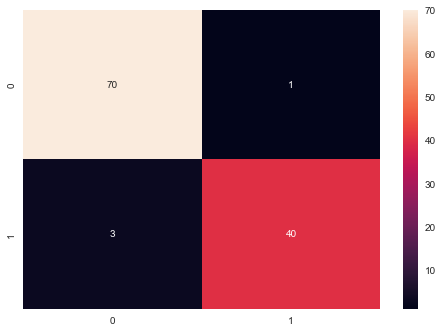

In [378]:
sns.heatmap(RF_confusion_matrix, annot=True)

In [379]:
scores = cross_val_score(RandomForest, X, y, cv=5)
print ('Cross validation - Random forest :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Random forest :
scores =  [0.92982456 0.95614035 0.98245614 0.97368421 0.97345133]
score moyen = 0.9631113181183046


In [380]:
recall_scores = cross_val_score(RandomForest, X, y, scoring='recall' , cv=10)
print ('Cross validation - RandomForest :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - RandomForest :
scores =  [1.         0.81818182 0.9047619  0.85714286 1.         1.
 0.95238095 0.95238095 0.95238095 1.        ]
score recall moyen = 0.9437229437229437
score recall std = 0.061374228912371535


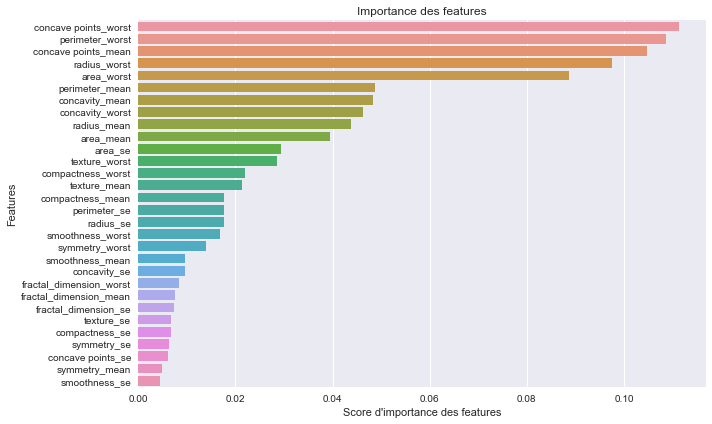

In [381]:
#https://medium.com/analytics-vidhya/random-forest-on-titanic-dataset-88327a014b4d

FeatureImportance = pd.Series(RandomForest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=FeatureImportance, y=FeatureImportance.index)
# Légendes et apparence
plt.xlabel("Score d'importance des features")
plt.ylabel('Features')
plt.title("Importance des features")
plt.tight_layout()

Using 114 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/114 [00:00<?, ?it/s]

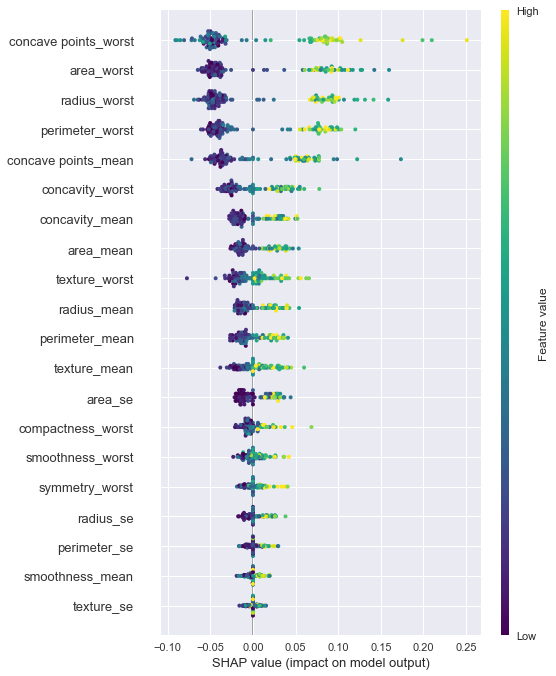

In [383]:
explainer = shap.KernelExplainer(RandomForest.predict, X_test)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, cmap = 'viridis')

Les variables les plus importantes sont le plus grand nombre de points concaves, la plus grande aire, le plus grand rayon et le plus grand périmètre.

In [185]:
#Standard scaler 

In [186]:
# Grid search 
RF=RandomForestClassifier()
RF_parameters = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'], 
}

RF = GridSearchCV(RF, RF_parameters, scoring="accuracy", cv=5)
RF.fit(X_train_standardscale, y_train)
RF_best_parameters = RF.best_params_
print(f"Best paramters: {RF_best_parameters})")

Best paramters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200})


In [506]:
RandomForest = RandomForestClassifier(criterion = 'entropy', max_depth= 7, max_features= 'sqrt', n_estimators= 200)
RandomForest.fit(X_train_standardscale, y_train)
RandomForest_prediction = RandomForest.predict(X_test_standardscale)
y_val = RandomForest.predict(X_train_standardscale)
accuracy_score(y_train, y_val)

1.0

In [507]:
accuracy_score(y_test, RandomForest_prediction)

0.9649122807017544

In [508]:
print(classification_report(y_test, RandomForest_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [509]:
RF_confusion_matrix = confusion_matrix(y_test, RandomForest_prediction)
print(RF_confusion_matrix)

[[70  1]
 [ 3 40]]


<AxesSubplot:>

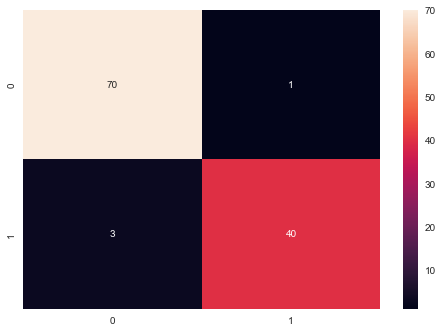

In [510]:
sns.heatmap(RF_confusion_matrix, annot=True)

In [511]:
scores = cross_val_score(RandomForest, X, y, cv=5)
print ('Cross validation - Random forest :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))
print('score std =', np.std(scores))

Cross validation - Random forest :
scores =  [0.92982456 0.95614035 0.99122807 0.96491228 0.96460177]
score moyen = 0.9613414066138798
score std = 0.019682257402119128


In [512]:
recall_scores = cross_val_score(RandomForest, X, y, scoring='recall' , cv=10)
print ('Cross validation - RandomForest :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - RandomForest :
scores =  [1.         0.81818182 0.9047619  0.85714286 1.         1.
 0.9047619  0.95238095 0.95238095 1.        ]
score recall moyen = 0.938961038961039
score recall std = 0.06235719992051339


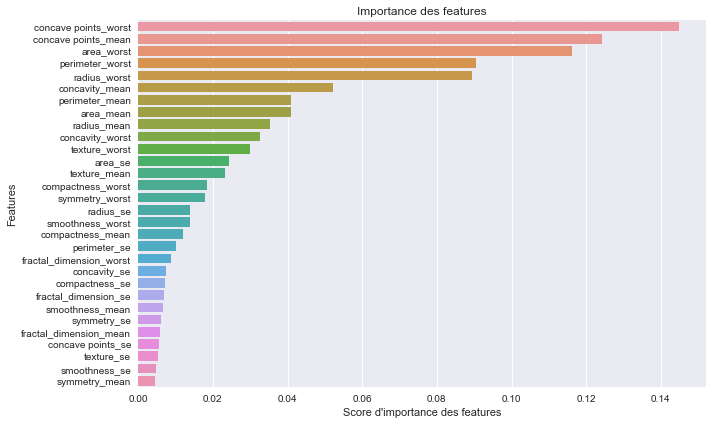

In [513]:
FeatureImportance = pd.Series(RandomForest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=FeatureImportance, y=FeatureImportance.index)
# Légendes et apparence
plt.xlabel("Score d'importance des features")
plt.ylabel('Features')
plt.title("Importance des features")
plt.tight_layout()

In [520]:
list(X_test.columns.values)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

Using 114 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/114 [00:00<?, ?it/s]

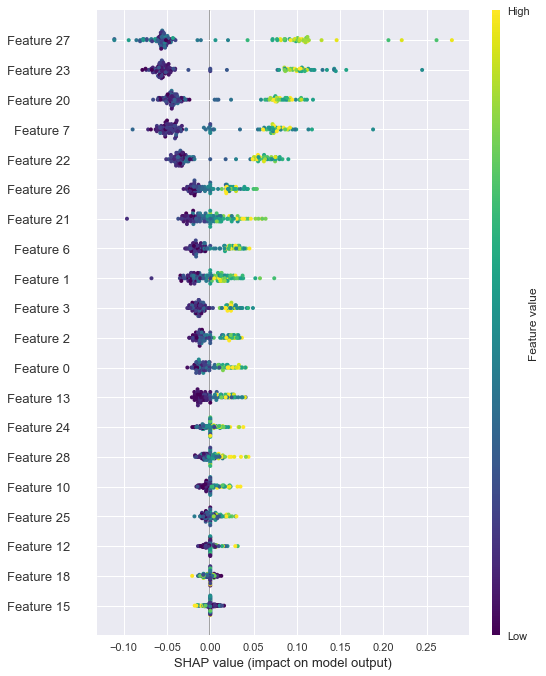

In [516]:
explainer = shap.KernelExplainer(RandomForest.predict, X_test_standardscale)
shap_values = explainer.shap_values(X_test_standardscale)

shap.summary_plot(shap_values, X_test_standardscale, cmap = 'viridis')

Les features les plus importants sont concave point_worst, area worst, radius worst, concave points_mean

In [196]:
# Robust scaler
# Grid search 
RF=RandomForestClassifier()
RF_parameters = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'], 
}

RF = GridSearchCV(RF, RF_parameters, scoring="accuracy", cv=5)
RF.fit(X_train_robustscale, y_train)
RF_best_parameters = RF.best_params_
print(f"Best paramters: {RF_best_parameters})")

Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200})


In [228]:
RandomForest = RandomForestClassifier(criterion = 'entropy', max_depth= 6, max_features= 'auto', n_estimators= 200)
RandomForest.fit(X_train_robustscale, y_train)
RandomForest_prediction = RandomForest.predict(X_test_robustscale)
y_val = RandomForest.predict(X_train_robustscale)
accuracy_score(y_train, y_val)

0.9978021978021978

In [229]:
accuracy_score(y_test, RandomForest_prediction)

0.9649122807017544

In [230]:
print(classification_report(y_test, RandomForest_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



[[70  1]
 [ 3 40]]


<AxesSubplot:>

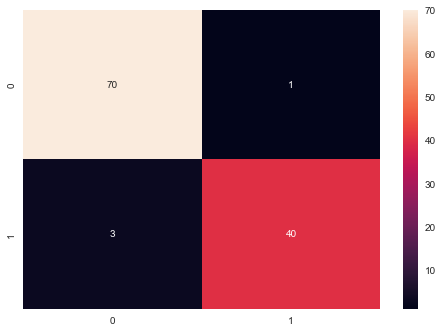

In [231]:
RF_confusion_matrix = confusion_matrix(y_test, RandomForest_prediction)
print(RF_confusion_matrix)
sns.heatmap(RF_confusion_matrix, annot=True)

In [232]:
scores = cross_val_score(RandomForest, X, y, cv=5)
print ('Cross validation - Random forest :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Random forest :
scores =  [0.94736842 0.94736842 0.98245614 0.97368421 0.96460177]
score moyen = 0.9630957925787922


In [233]:
recall_scores = cross_val_score(RandomForest, X, y, scoring='recall' , cv=10)
print ('Cross validation - RandomForest :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - RandomForest :
scores =  [1.         0.86363636 0.9047619  0.85714286 0.95238095 1.
 0.85714286 0.95238095 0.95238095 1.        ]
score recall moyen = 0.9339826839826839
score recall std = 0.05630410605332481


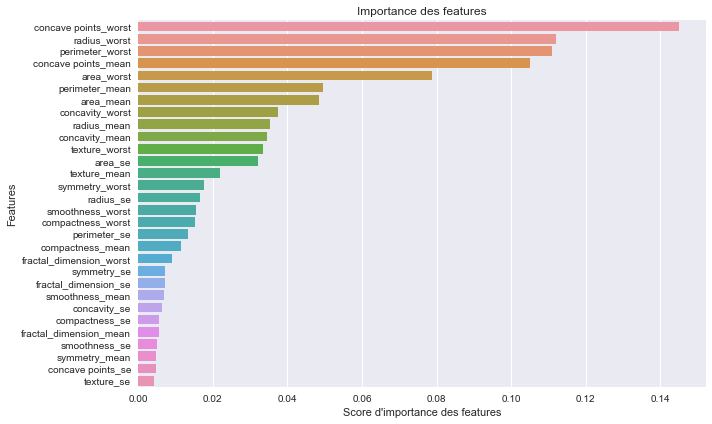

In [234]:
FeatureImportance = pd.Series(RandomForest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=FeatureImportance, y=FeatureImportance.index)
# Légendes et apparence
plt.xlabel("Score d'importance des features")
plt.ylabel('Features')
plt.title("Importance des features")
plt.tight_layout()

In [204]:
#MinMaxScaler
# Grid search 
RF=RandomForestClassifier()
RF_parameters = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'], 
}

RF = GridSearchCV(RF, RF_parameters, scoring="accuracy", cv=5)
RF.fit(X_train_minmaxscale, y_train)
RF_best_parameters = RF.best_params_
print(f"Best paramters: {RF_best_parameters})")

Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 200})


In [235]:
RandomForest = RandomForestClassifier(criterion = 'entropy', max_depth= 6, max_features= 'log2', n_estimators= 200)
RandomForest.fit(X_train_minmaxscale, y_train)
RandomForest_prediction = RandomForest.predict(X_test_minmaxscale)
y_val = RandomForest.predict(X_train_minmaxscale)
accuracy_score(y_train, y_val)

0.9978021978021978

In [236]:
accuracy_score(y_test, RandomForest_prediction)

0.9649122807017544

In [237]:
print(classification_report(y_test, RandomForest_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



[[70  1]
 [ 3 40]]


<AxesSubplot:>

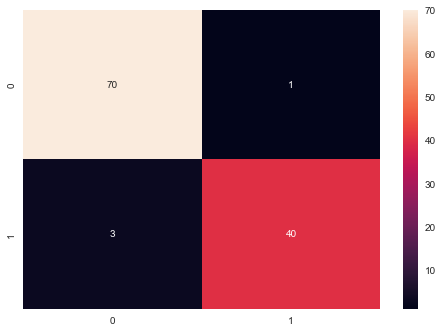

In [238]:
RF_confusion_matrix = confusion_matrix(y_test, RandomForest_prediction)
print(RF_confusion_matrix)
sns.heatmap(RF_confusion_matrix, annot=True)

In [239]:
scores = cross_val_score(RandomForest, X, y, cv=5)
print ('Cross validation - Random forest :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Random forest :
scores =  [0.92982456 0.95614035 0.99122807 0.97368421 0.96460177]
score moyen = 0.9630957925787922


In [240]:
recall_scores = cross_val_score(RandomForest, X, y, scoring='recall' , cv=10)
print ('Cross validation - RandomForest :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - RandomForest :
scores =  [1.         0.86363636 0.85714286 0.9047619  0.95238095 1.
 0.9047619  0.95238095 0.95238095 1.        ]
score recall moyen = 0.9387445887445887
score recall std = 0.05140453400675946


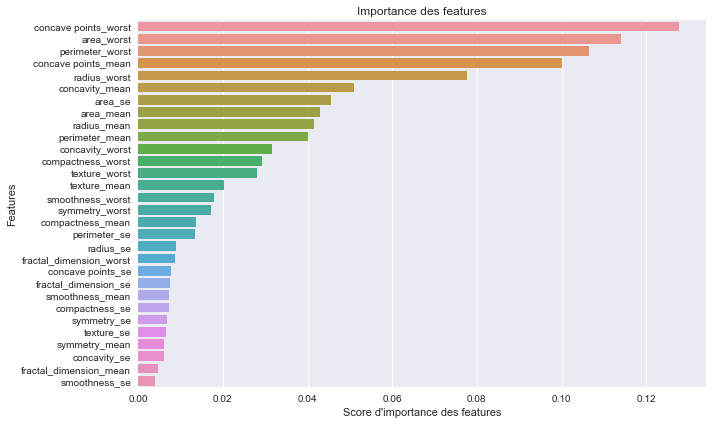

In [241]:
FeatureImportance = pd.Series(RandomForest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=FeatureImportance, y=FeatureImportance.index)
# Légendes et apparence
plt.xlabel("Score d'importance des features")
plt.ylabel('Features')
plt.title("Importance des features")
plt.tight_layout()

In [213]:
#MaxAbsScaler
# Grid search 
RF=RandomForestClassifier()
RF_parameters = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'], 
}

RF = GridSearchCV(RF, RF_parameters, scoring="accuracy", cv=5)
RF.fit(X_train_maxabsscale, y_train)
RF_best_parameters = RF.best_params_
print(f"Best paramters: {RF_best_parameters})")

Best paramters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200})


In [242]:
RandomForest = RandomForestClassifier(criterion = 'entropy', max_depth= 7, max_features= 'auto', n_estimators= 200)
RandomForest.fit(X_train_maxabsscale, y_train)
RandomForest_prediction = RandomForest.predict(X_test_maxabsscale)
y_val = RandomForest.predict(X_train_maxabsscale)
accuracy_score(y_train, y_val)

1.0

In [243]:
accuracy_score(y_test, RandomForest_prediction)

0.9649122807017544

In [244]:
print(classification_report(y_test, RandomForest_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



[[70  1]
 [ 3 40]]


<AxesSubplot:>

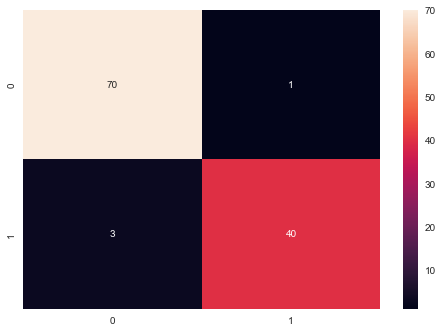

In [245]:
RF_confusion_matrix = confusion_matrix(y_test, RandomForest_prediction)
print(RF_confusion_matrix)
sns.heatmap(RF_confusion_matrix, annot=True)

In [246]:
scores = cross_val_score(RandomForest, X, y, cv=5)
print ('Cross validation - Random forest :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - Random forest :
scores =  [0.93859649 0.95614035 0.99122807 0.97368421 0.97345133]
score moyen = 0.9666200900481293


In [247]:
recall_scores = cross_val_score(RandomForest, X, y, scoring='recall' , cv=10)
print ('Cross validation - RandomForest :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - RandomForest :
scores =  [1.         0.86363636 0.9047619  0.85714286 0.95238095 1.
 0.9047619  0.95238095 0.95238095 1.        ]
score recall moyen = 0.9387445887445887
score recall std = 0.05140453400675946


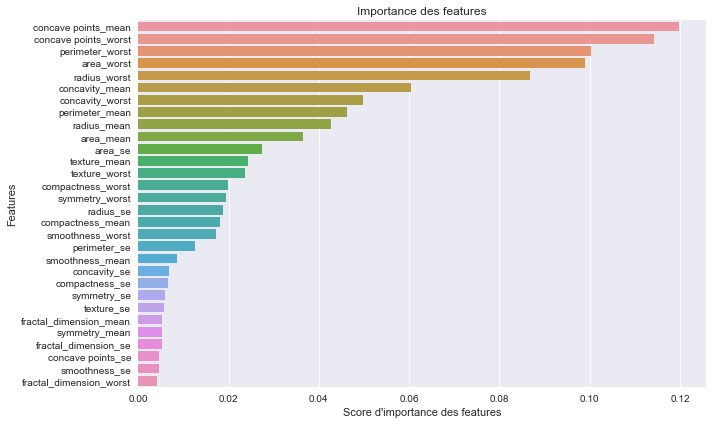

In [248]:
FeatureImportance = pd.Series(RandomForest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=FeatureImportance, y=FeatureImportance.index)
# Légendes et apparence
plt.xlabel("Score d'importance des features")
plt.ylabel('Features')
plt.title("Importance des features")
plt.tight_layout()

In [221]:
# PCA features
# Grid search 
RF=RandomForestClassifier()
RF_parameters = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'], 
}

RF = GridSearchCV(RF, RF_parameters, scoring="accuracy", cv=5)
RF.fit(X_train_PCA, y_train)
RF_best_parameters = RF.best_params_
print(f"Best paramters: {RF_best_parameters})")

Best paramters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200})


In [249]:
RandomForest = RandomForestClassifier(criterion = 'gini', max_depth= 5, max_features= 'sqrt', n_estimators= 200)
RandomForest.fit(X_train_PCA, y_train)
RandomForest_prediction = RandomForest.predict(X_test_PCA)
y_val = RandomForest.predict(X_train_PCA)
accuracy_score(y_train, y_val)

0.9802197802197802

In [250]:
accuracy_score(y_test, RandomForest_prediction)

0.9649122807017544

In [251]:
print(classification_report(y_test, RandomForest_prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



<AxesSubplot:>

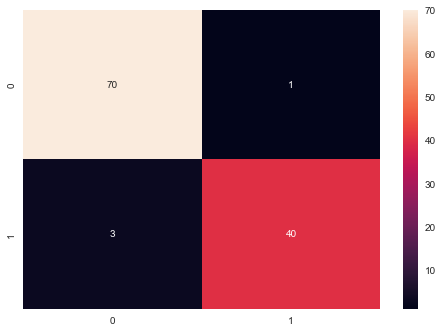

In [252]:
sns.heatmap(RF_confusion_matrix, annot=True)

In [253]:
scores = cross_val_score(RandomForest, X, y, cv=5)
print ('Cross validation - Random forest :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))
print('score std =', np.std(scores))

Cross validation - Random forest :
scores =  [0.92982456 0.93859649 0.98245614 0.97368421 0.96460177]
score moyen = 0.9578326346840553


In [254]:
recall_scores = cross_val_score(RandomForest, X, y, scoring='recall' , cv=10)
print ('Cross validation - RandomForest :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - RandomForest :
scores =  [1.         0.81818182 0.85714286 0.85714286 1.         1.
 0.9047619  0.95238095 0.95238095 1.        ]
score recall moyen = 0.9341991341991343
score recall std = 0.06646960248543458


* kNN

In [464]:
error_rate = []# Will take some time
for i in range(1,40):
 
 kNN = KNeighborsClassifier(n_neighbors=i)
 kNN.fit(X_train,y_train)
 pred_i = kNN.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

#https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7

Text(0, 0.5, 'Error Rate')

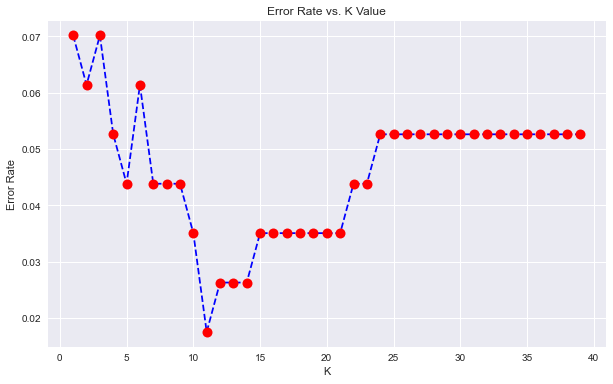

In [465]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [472]:
kNN = KNeighborsClassifier(n_neighbors=14, weights='distance')

In [474]:
#Sans scaling
kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [475]:
kNN_prediction = kNN.predict(X_test)

In [476]:
accuracy_score(kNN_prediction,y_test)

0.9649122807017544

In [477]:
print(classification_report(y_test, kNN_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [478]:
kNN_confusion_matrix = confusion_matrix(y_test, kNN_prediction)
print(kNN_confusion_matrix)

[[70  1]
 [ 3 40]]


<AxesSubplot:>

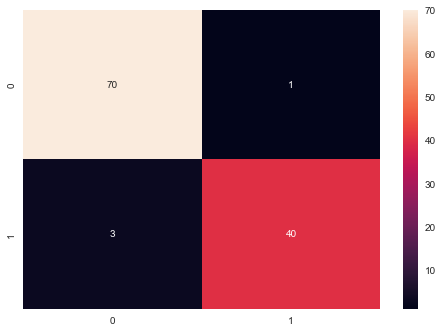

In [479]:
sns.heatmap(kNN_confusion_matrix, annot=True)

In [480]:
scores = cross_val_score(kNN, X, y, cv=5)
print ('Cross validation - kNN :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - kNN :
scores =  [0.86842105 0.93859649 0.93859649 0.95614035 0.9380531 ]
score moyen = 0.9279614966620089


In [266]:
recall_scores = cross_val_score(kNN, X, y, scoring='recall' , cv=10)
print ('Cross validation - kNN :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - kNN :
scores =  [0.77272727 0.68181818 0.85714286 0.9047619  0.9047619  0.9047619
 0.95238095 0.9047619  0.95238095 0.9047619 ]
score recall moyen = 0.8740259740259742
score recall std = 0.0803074058620525


In [481]:
#StandardScaler
kNN.fit(X_train_standardscale, y_train)

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [482]:
kNN_prediction = kNN.predict(X_test_standardscale)

In [483]:
accuracy_score(kNN_prediction,y_test)

0.956140350877193

In [484]:
print(classification_report(y_test, kNN_prediction))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [485]:
kNN_confusion_matrix = confusion_matrix(y_test, kNN_prediction)
print(kNN_confusion_matrix)

[[69  2]
 [ 3 40]]


<AxesSubplot:>

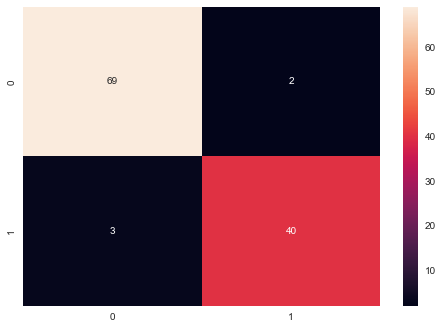

In [486]:
sns.heatmap(kNN_confusion_matrix, annot=True)

In [487]:
scores = cross_val_score(kNN, X, y, cv=5)
print ('Cross validation - kNN :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))
print('score std =', np.std(scores))

Cross validation - kNN :
scores =  [0.86842105 0.93859649 0.93859649 0.95614035 0.9380531 ]
score moyen = 0.9279614966620089
score std = 0.030552115878967487


In [488]:
recall_scores = cross_val_score(kNN, X, y, scoring='recall' , cv=10)
print ('Cross validation - kNN :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - kNN :
scores =  [0.77272727 0.68181818 0.85714286 0.9047619  0.9047619  0.9047619
 0.95238095 0.9047619  0.95238095 0.9047619 ]
score recall moyen = 0.8740259740259742
score recall std = 0.0803074058620525


In [277]:
#Robust Scaler
kNN.fit(X_train_robustscale, y_train)

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [278]:
kNN_prediction = kNN.predict(X_test_robustscale)

In [279]:
accuracy_score(kNN_prediction,y_test)

0.956140350877193

In [280]:
print(classification_report(y_test, kNN_prediction))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [281]:
kNN_confusion_matrix = confusion_matrix(y_test, kNN_prediction)
print(kNN_confusion_matrix)

[[69  2]
 [ 3 40]]


<AxesSubplot:>

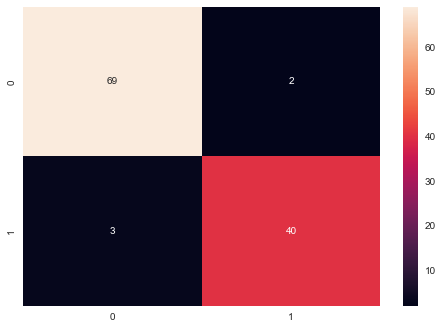

In [282]:
sns.heatmap(kNN_confusion_matrix, annot=True)

In [283]:
scores = cross_val_score(kNN, X, y, cv=5)
print ('Cross validation - kNN :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - kNN :
scores =  [0.86842105 0.93859649 0.93859649 0.95614035 0.9380531 ]
score moyen = 0.9279614966620089


In [284]:
recall_scores = cross_val_score(kNN, X, y, scoring='recall' , cv=10)
print ('Cross validation - kNN :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - kNN :
scores =  [0.77272727 0.68181818 0.85714286 0.9047619  0.9047619  0.9047619
 0.95238095 0.9047619  0.95238095 0.9047619 ]
score recall moyen = 0.8740259740259742
score recall std = 0.0803074058620525


In [286]:
#MinMaxScaler
kNN.fit(X_train_minmaxscale, y_train)

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [287]:
kNN_prediction = kNN.predict(X_test_minmaxscale)

In [288]:
accuracy_score(kNN_prediction,y_test)

0.9649122807017544

In [289]:
print(classification_report(y_test, kNN_prediction))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [290]:
kNN_confusion_matrix = confusion_matrix(y_test, kNN_prediction)
print(kNN_confusion_matrix)

[[69  2]
 [ 2 41]]


<AxesSubplot:>

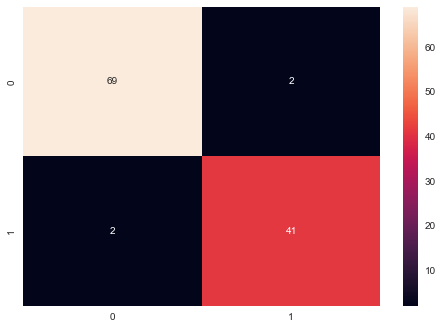

In [291]:
sns.heatmap(kNN_confusion_matrix, annot=True)

In [292]:
scores = cross_val_score(kNN, X, y, cv=5)
print ('Cross validation - kNN :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - kNN :
scores =  [0.86842105 0.93859649 0.93859649 0.95614035 0.9380531 ]
score moyen = 0.9279614966620089


In [293]:
recall_scores = cross_val_score(kNN, X, y, scoring='recall' , cv=10)
print ('Cross validation - kNN :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - kNN :
scores =  [0.77272727 0.68181818 0.85714286 0.9047619  0.9047619  0.9047619
 0.95238095 0.9047619  0.95238095 0.9047619 ]
score recall moyen = 0.8740259740259742
score recall std = 0.0803074058620525


In [295]:
#MaxAbsScaler
kNN.fit(X_train_maxabsscale, y_train)

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [296]:
kNN_prediction = kNN.predict(X_test_maxabsscale)

In [297]:
accuracy_score(kNN_prediction,y_test)

0.9736842105263158

In [298]:
print(classification_report(y_test, kNN_prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [299]:
kNN_confusion_matrix = confusion_matrix(y_test, kNN_prediction)
print(kNN_confusion_matrix)

[[70  1]
 [ 2 41]]


<AxesSubplot:>

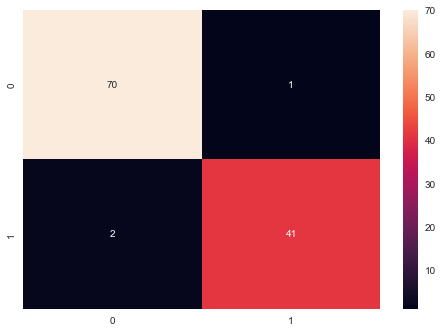

In [300]:
sns.heatmap(kNN_confusion_matrix, annot=True)

In [301]:
scores = cross_val_score(kNN, X, y, cv=5)
print ('Cross validation - kNN :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - kNN :
scores =  [0.86842105 0.93859649 0.93859649 0.95614035 0.9380531 ]
score moyen = 0.9279614966620089


In [302]:
recall_scores = cross_val_score(kNN, X, y, scoring='recall' , cv=10)
print ('Cross validation - kNN :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - kNN :
scores =  [0.77272727 0.68181818 0.85714286 0.9047619  0.9047619  0.9047619
 0.95238095 0.9047619  0.95238095 0.9047619 ]
score recall moyen = 0.8740259740259742
score recall std = 0.0803074058620525


In [489]:
#PCA features
kNN.fit(X_train_PCA, y_train)

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [490]:
kNN_prediction = kNN.predict(X_test_PCA)

In [491]:
accuracy_score(kNN_prediction,y_test)

0.9649122807017544

In [492]:
print(classification_report(y_test, kNN_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [493]:
kNN_confusion_matrix = confusion_matrix(y_test, kNN_prediction)
print(kNN_confusion_matrix)

[[70  1]
 [ 3 40]]


<AxesSubplot:>

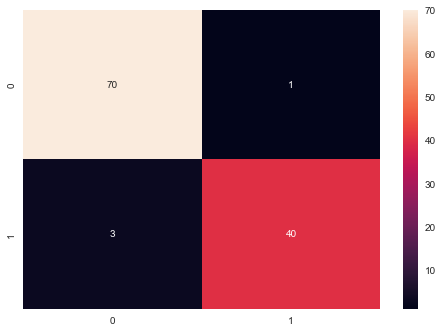

In [494]:
sns.heatmap(kNN_confusion_matrix, annot=True)

In [495]:
scores = cross_val_score(kNN, X, y, cv=5)
print ('Cross validation - kNN :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))
print('score std =', np.std(scores))

Cross validation - kNN :
scores =  [0.86842105 0.93859649 0.93859649 0.95614035 0.9380531 ]
score moyen = 0.9279614966620089
score std = 0.030552115878967487


In [311]:
recall_scores = cross_val_score(kNN, X, y, scoring='recall' , cv=10)
print ('Cross validation - kNN :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - kNN :
scores =  [0.77272727 0.68181818 0.85714286 0.9047619  0.9047619  0.9047619
 0.95238095 0.9047619  0.95238095 0.9047619 ]
score recall moyen = 0.8740259740259742
score recall std = 0.0803074058620525


* Réseau de neurones

https://towardsdatascience.com/convolutional-neural-network-for-breast-cancer-classification-52f1213dcc9

https://chriskhanhtran.github.io/minimal-portfolio/projects/breast-cancer.html

**SVM**

In [312]:
#grid search
SVC_classifier=SVC()
SVC_parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

SVC_classifier = GridSearchCV(SVC_classifier, SVC_parameters, scoring="recall", cv=10) # fixer la seed
SVC_classifier.fit(X_train, y_train)
SVC_best_parameters = SVC_classifier.best_params_
print(f"Best paramters: {SVC_best_parameters})")

Best paramters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'})


In [313]:
SVC_classifier = SVC(C = 1, gamma= 0.001 , kernel = 'rbf')
SVC_classifier.fit(X_train, y_train)
SVC_prediction = SVC_classifier.predict(X_test)
y_val = SVC_classifier.predict(X_train)
accuracy_score(y_train, y_val)

0.978021978021978

In [314]:
accuracy_score(y_test, SVC_prediction)

0.9298245614035088

In [315]:
print(classification_report(y_test, SVC_prediction))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        71
           1       0.89      0.93      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



Confusion matrix = [[66  5]
 [ 3 40]]


<AxesSubplot:>

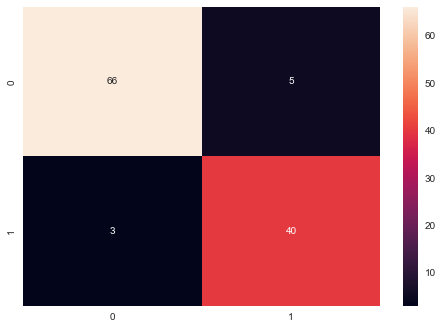

In [316]:
SVC_confusion_matrix = confusion_matrix(y_test, SVC_prediction)
print ('Confusion matrix =', SVC_confusion_matrix)
sns.heatmap(SVC_confusion_matrix, annot=True)

In [317]:
scores = cross_val_score(SVC_classifier, X, y, cv=10)
print ('Cross validation - SVM :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - SVM :
scores =  [0.96491228 0.92982456 0.9122807  0.92982456 0.92982456 0.9122807
 0.94736842 0.92982456 0.89473684 0.89285714]
score moyen = 0.92437343358396


In [318]:
recall_scores = cross_val_score(SVC_classifier, X, y, scoring='recall' , cv=10)
print ('Cross validation - SVM :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - SVM :
scores =  [0.95454545 0.90909091 0.85714286 0.9047619  0.9047619  0.95238095
 0.9047619  0.9047619  0.95238095 0.95238095]
score recall moyen = 0.9196969696969697
score recall std = 0.030556300898449983


In [319]:
#Standard Scaler
#grid search
SVC_classifier=SVC()
SVC_parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

SVC_classifier = GridSearchCV(SVC_classifier, SVC_parameters, scoring="recall", cv=10) # fixer la seed
SVC_classifier.fit(X_train_standardscale, y_train)
SVC_best_parameters = SVC_classifier.best_params_
print(f"Best paramters: {SVC_best_parameters})")

Best paramters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'})


In [496]:
SVC_classifier = SVC(C = 10, gamma= 0.001 , kernel = 'rbf')
SVC_classifier.fit(X_train_standardscale, y_train)
SVC_prediction = SVC_classifier.predict(X_test_standardscale)
y_val = SVC_classifier.predict(X_train_standardscale)
accuracy_score(y_train, y_val)

0.978021978021978

In [497]:
accuracy_score(y_test, SVC_prediction)

0.9824561403508771

In [498]:
print(classification_report(y_test, SVC_prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Confusion matrix = [[71  0]
 [ 2 41]]


<AxesSubplot:>

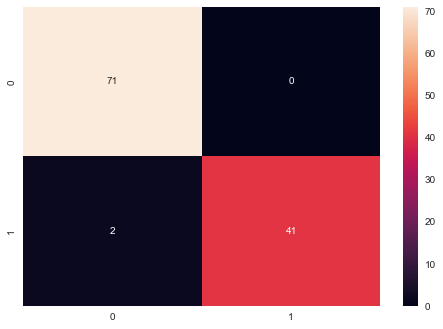

In [499]:
SVC_confusion_matrix = confusion_matrix(y_test, SVC_prediction)
print ('Confusion matrix =', SVC_confusion_matrix)
sns.heatmap(SVC_confusion_matrix, annot=True)

In [500]:
scores = cross_val_score(SVC_classifier, X, y, cv=10)
print ('Cross validation - SVM :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))
print('score std =', np.std(scores))

Cross validation - SVM :
scores =  [0.94736842 0.89473684 0.9122807  0.89473684 0.92982456 0.9122807
 0.94736842 0.92982456 0.89473684 0.875     ]
score moyen = 0.9138157894736842
score std = 0.02316790221035478


In [325]:
recall_scores = cross_val_score(SVC_classifier, X, y, scoring='recall' , cv=10)
print ('Cross validation - SVM :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - SVM :
scores =  [0.90909091 0.90909091 0.85714286 0.85714286 0.9047619  0.95238095
 0.9047619  0.95238095 0.9047619  0.9047619 ]
score recall moyen = 0.9056277056277058
score recall std = 0.03016666907391229


In [326]:
#Robust Scaler
#grid search
SVC_classifier=SVC()
SVC_parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

SVC_classifier = GridSearchCV(SVC_classifier, SVC_parameters, scoring="recall", cv=10) # fixer la seed
SVC_classifier.fit(X_train_robustscale, y_train)
SVC_best_parameters = SVC_classifier.best_params_
print(f"Best paramters: {SVC_best_parameters})")

Best paramters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'})


In [327]:
SVC_classifier = SVC(C = 100, gamma= 0.1 , kernel = 'rbf')
SVC_classifier.fit(X_train_robustscale, y_train)
SVC_prediction = SVC_classifier.predict(X_test_robustscale)
y_val = SVC_classifier.predict(X_train_robustscale)
accuracy_score(y_train, y_val)

1.0

In [328]:
accuracy_score(y_test, SVC_prediction)

0.956140350877193

In [329]:
print(classification_report(y_test, SVC_prediction))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Confusion matrix = [[68  3]
 [ 2 41]]


<AxesSubplot:>

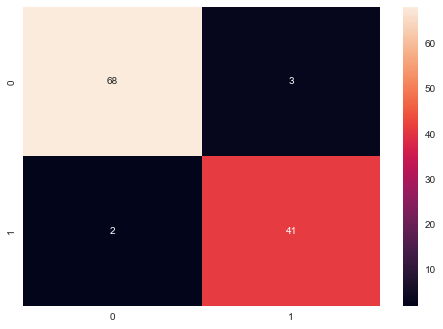

In [330]:
SVC_confusion_matrix = confusion_matrix(y_test, SVC_prediction)
print ('Confusion matrix =', SVC_confusion_matrix)
sns.heatmap(SVC_confusion_matrix, annot=True)

In [331]:
scores = cross_val_score(SVC_classifier, X, y, cv=10)
print ('Cross validation - SVM :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - SVM :
scores =  [0.61403509 0.61403509 0.63157895 0.63157895 0.63157895 0.63157895
 0.63157895 0.63157895 0.63157895 0.625     ]
score moyen = 0.6274122807017544


In [333]:
recall_scores = cross_val_score(SVC_classifier, X, y, scoring='recall' , cv=10)
print ('Cross validation - SVM :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))
#il semble qu'il y ai un problème

Cross validation - SVM :
scores =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
score recall moyen = 0.0
score recall std = 0.0


In [334]:
#MinMax Scaler
#grid search
SVC_classifier=SVC()
SVC_parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

SVC_classifier = GridSearchCV(SVC_classifier, SVC_parameters, scoring="recall", cv=10) # fixer la seed
SVC_classifier.fit(X_train_minmaxscale, y_train)
SVC_best_parameters = SVC_classifier.best_params_
print(f"Best paramters: {SVC_best_parameters})")

Best paramters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'})


In [335]:
SVC_classifier = SVC(C = 1000, gamma= 0.1 , kernel = 'rbf')
SVC_classifier.fit(X_train_minmaxscale, y_train)
SVC_prediction = SVC_classifier.predict(X_test_minmaxscale)
y_val = SVC_classifier.predict(X_train_minmaxscale)
accuracy_score(y_train, y_val)

0.9978021978021978

In [336]:
accuracy_score(y_test, SVC_prediction)

0.9649122807017544

In [337]:
print(classification_report(y_test, SVC_prediction))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Confusion matrix = [[69  2]
 [ 2 41]]


<AxesSubplot:>

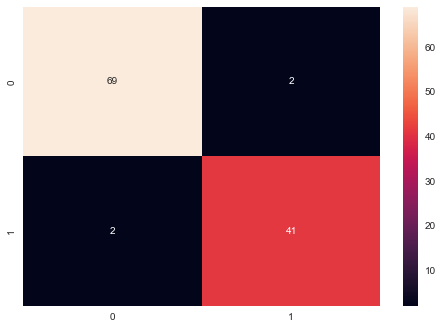

In [338]:
SVC_confusion_matrix = confusion_matrix(y_test, SVC_prediction)
print ('Confusion matrix =', SVC_confusion_matrix)
sns.heatmap(SVC_confusion_matrix, annot=True)

In [339]:
scores = cross_val_score(SVC_classifier, X, y, cv=10)
print ('Cross validation - SVM :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - SVM :
scores =  [0.61403509 0.61403509 0.63157895 0.63157895 0.63157895 0.63157895
 0.63157895 0.63157895 0.63157895 0.625     ]
score moyen = 0.6274122807017544


In [340]:
recall_scores = cross_val_score(SVC_classifier, X, y, scoring='recall' , cv=10)
print ('Cross validation - SVM :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - SVM :
scores =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
score recall moyen = 0.0
score recall std = 0.0


In [341]:
#MMaxAbs Scaler
#grid search
SVC_classifier=SVC()
SVC_parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

SVC_classifier = GridSearchCV(SVC_classifier, SVC_parameters, scoring="recall", cv=10) # fixer la seed
SVC_classifier.fit(X_train_maxabsscale, y_train)
SVC_best_parameters = SVC_classifier.best_params_
print(f"Best paramters: {SVC_best_parameters})")

Best paramters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'})


In [342]:
SVC_classifier = SVC(C = 1000, gamma= 0.1 , kernel = 'rbf')
SVC_classifier.fit(X_train_maxabsscale, y_train)
SVC_prediction = SVC_classifier.predict(X_test_maxabsscale)
y_val = SVC_classifier.predict(X_train_maxabsscale)
accuracy_score(y_train, y_val)

0.9956043956043956

In [343]:
accuracy_score(y_test, SVC_prediction)

0.9736842105263158

In [344]:
print(classification_report(y_test, SVC_prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Confusion matrix = [[70  1]
 [ 2 41]]


<AxesSubplot:>

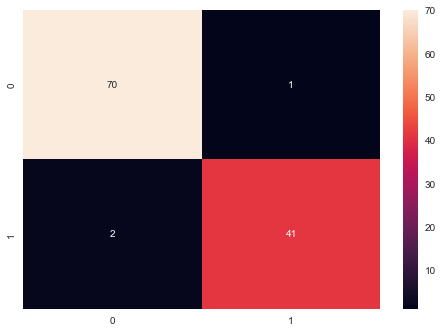

In [345]:
SVC_confusion_matrix = confusion_matrix(y_test, SVC_prediction)
print ('Confusion matrix =', SVC_confusion_matrix)
sns.heatmap(SVC_confusion_matrix, annot=True)

In [346]:
scores = cross_val_score(SVC_classifier, X, y, cv=10)
print ('Cross validation - SVM :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))

Cross validation - SVM :
scores =  [0.61403509 0.61403509 0.63157895 0.63157895 0.63157895 0.63157895
 0.63157895 0.63157895 0.63157895 0.625     ]
score moyen = 0.6274122807017544


In [347]:
recall_scores = cross_val_score(SVC_classifier, X, y, scoring='recall' , cv=10)
print ('Cross validation - SVM :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - SVM :
scores =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
score recall moyen = 0.0
score recall std = 0.0


In [349]:
#PCA features
#grid search
SVC_classifier=SVC()
SVC_parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

SVC_classifier = GridSearchCV(SVC_classifier, SVC_parameters, scoring="recall", cv=10) # fixer la seed
SVC_classifier.fit(X_train_PCA, y_train)
SVC_best_parameters = SVC_classifier.best_params_
print(f"Best paramters: {SVC_best_parameters})")

Best paramters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'})


In [501]:
SVC_classifier = SVC(C = 1, gamma= 0.001 , kernel = 'rbf')
SVC_classifier.fit(X_train_PCA, y_train)
SVC_prediction = SVC_classifier.predict(X_test_PCA)
y_val = SVC_classifier.predict(X_train_PCA)
accuracy_score(y_train, y_val)

0.978021978021978

In [502]:
accuracy_score(y_test, SVC_prediction)

0.9298245614035088

print(classification_report(y_test, SVC_prediction))

Confusion matrix = [[66  5]
 [ 3 40]]


<AxesSubplot:>

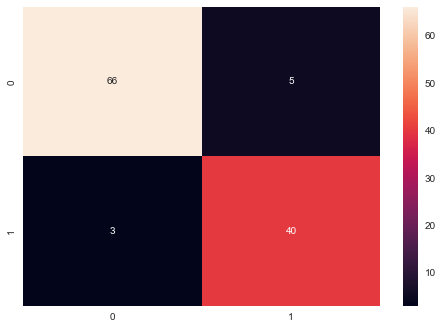

In [503]:
SVC_confusion_matrix = confusion_matrix(y_test, SVC_prediction)
print ('Confusion matrix =', SVC_confusion_matrix)
sns.heatmap(SVC_confusion_matrix, annot=True)

In [504]:
scores = cross_val_score(SVC_classifier, X, y, cv=10)
print ('Cross validation - SVM :')
print('scores = ', scores)
print('score moyen =', np.mean(scores))
print('score std =', np.std(scores))

Cross validation - SVM :
scores =  [0.96491228 0.92982456 0.9122807  0.92982456 0.92982456 0.9122807
 0.94736842 0.92982456 0.89473684 0.89285714]
score moyen = 0.92437343358396
score std = 0.02110710594610477


In [505]:
recall_scores = cross_val_score(SVC_classifier, X, y, scoring='recall' , cv=10)
print ('Cross validation - SVM :')
print('scores = ', recall_scores)
print('score recall moyen =', np.mean(recall_scores))
print('score recall std =', np.std(recall_scores))

Cross validation - SVM :
scores =  [0.95454545 0.90909091 0.85714286 0.9047619  0.9047619  0.95238095
 0.9047619  0.9047619  0.95238095 0.95238095]
score recall moyen = 0.9196969696969697
score recall std = 0.030556300898449983


Représentation graphique de la comparaison des modèles :

In [355]:
from sklearn import metrics

# lets first define a function that'll help us know how good/bad our model is doing
def get_scores(y_preds,y):
    return {
        'Accuracy':metrics.accuracy_score(y_preds,y),
        'Precision':metrics.precision_score(y_preds,y),
        'Recall':metrics.recall_score(y_preds,y),
        'F1':metrics.f1_score(y_preds,y),
        'ROC_AUC': metrics.roc_auc_score(y_preds,y)
    }

In [356]:
# fonction qui entraine les modèles pour nous
def train_model(model):
    model_=model
    model_.fit(X_train_standardscale,y_train)
    y_preds=model_.predict(X_test_standardscale)
    return get_scores(y_preds,y_test)

In [360]:
model_list=[
            DecisionTreeClassifier(random_state=42), 
            RandomForestClassifier(random_state=42),
            LogisticRegression(random_state=42),
            SVC(random_state=42),
            KNeighborsClassifier(n_neighbors=14, weights='distance')
           ]
model_names=['Decision Tree', 'Random Forest', 'Logistic Reg', 'SVM', 'kNN']

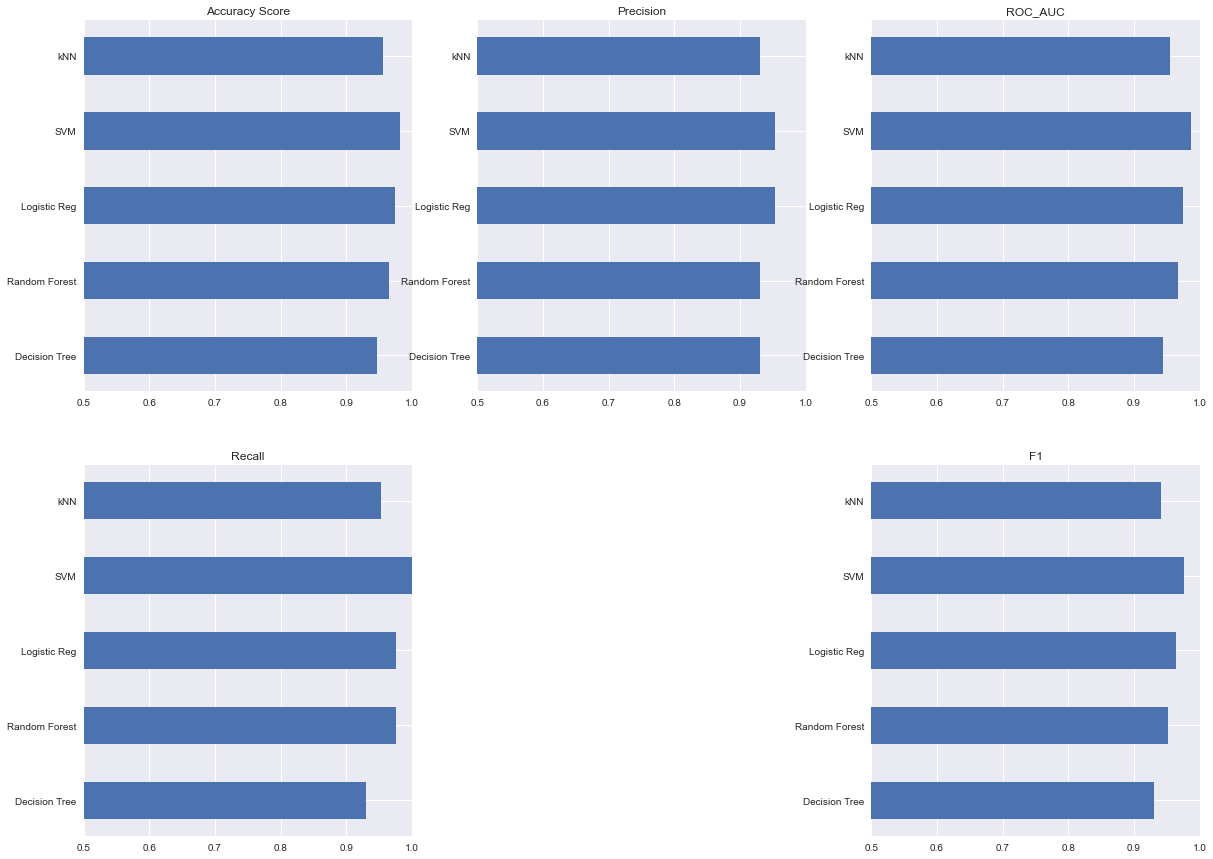

In [361]:
from turtle import color


scores = pd.DataFrame(columns=['Name','Accuracy','Precision',
                                'Recall',
                                'F1',
                                'ROC_AUC'])
for i in range(len(model_list)):
    score=train_model(model_list[i])
    scores.loc[i]=[model_names[i]]+list(score.values())

figure, axis = plt.subplots(2, 3)
figure.set_figheight(15)
figure.set_figwidth(20)

for i in range(2):
    for j in range(3):
        axis[i,j].set_xlim([.5, 1])
        
axis[0, 0].barh(scores['Name'],scores['Accuracy'],height=.5,)
axis[0, 0].set_title("Accuracy Score")
  
axis[0, 1].barh(scores['Name'],scores['Precision'],height=.5)
axis[0, 1].set_title("Precision")

axis[1, 0].barh(scores['Name'],scores['Recall'],height=.5)
axis[1, 0].set_title("Recall")

axis[1, 2].barh(scores['Name'],scores['F1'],height=.5)
axis[1, 2].set_title("F1")

axis[0, 2].barh(scores['Name'],scores['ROC_AUC'],height=.5)
axis[0, 2].set_title('ROC_AUC')

axis[1, 1].set_visible(False)

plt.show()

Représentation pour les données transformées par PCA

In [362]:
from sklearn import metrics

# lets first define a function that'll help us know how good/bad our model is doing
def get_scores(y_preds,y):
    return {
        'Accuracy':metrics.accuracy_score(y_preds,y),
        'Precision':metrics.precision_score(y_preds,y),
        'Recall':metrics.recall_score(y_preds,y),
        'F1':metrics.f1_score(y_preds,y),
        'ROC_AUC': metrics.roc_auc_score(y_preds,y)
    }

In [363]:
# fonction qui entraine les modèles pour nous
def train_model(model):
    model_=model
    model_.fit(X_train_PCA,y_train)
    y_preds=model_.predict(X_test_PCA)
    return get_scores(y_preds,y_test)

In [364]:
model_list=[
            DecisionTreeClassifier(random_state=42), 
            RandomForestClassifier(random_state=42),
            LogisticRegression(random_state=42),
            SVC(random_state=42),
            KNeighborsClassifier(n_neighbors=14, weights='distance')
           ]
model_names=['Decision Tree', 'Random Forest', 'Logistic Reg', 'SVM', 'kNN']

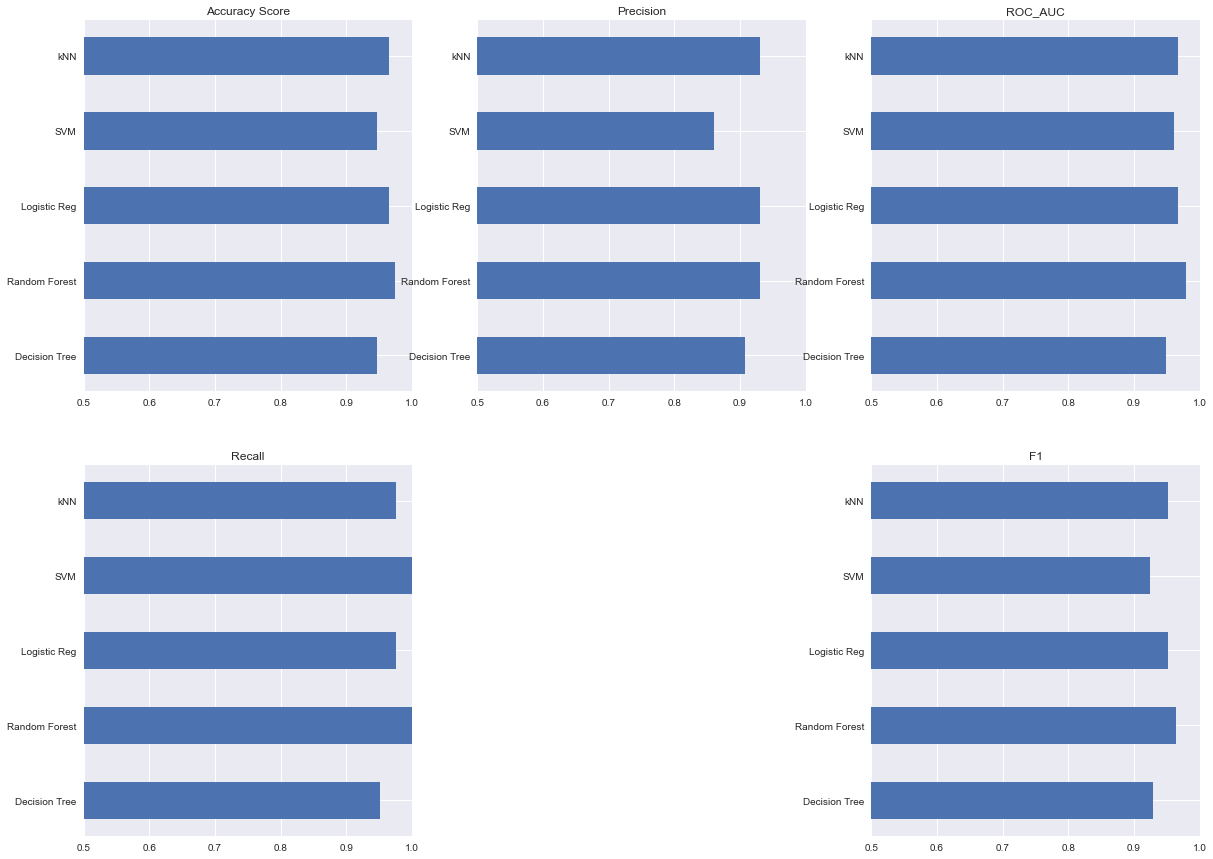

In [365]:
from turtle import color


scores = pd.DataFrame(columns=['Name','Accuracy','Precision',
                                'Recall',
                                'F1',
                                'ROC_AUC'])
for i in range(len(model_list)):
    score=train_model(model_list[i])
    scores.loc[i]=[model_names[i]]+list(score.values())

figure, axis = plt.subplots(2, 3)
figure.set_figheight(15)
figure.set_figwidth(20)

for i in range(2):
    for j in range(3):
        axis[i,j].set_xlim([.5, 1])
        
axis[0, 0].barh(scores['Name'],scores['Accuracy'],height=.5,)
axis[0, 0].set_title("Accuracy Score")
  
axis[0, 1].barh(scores['Name'],scores['Precision'],height=.5)
axis[0, 1].set_title("Precision")

axis[1, 0].barh(scores['Name'],scores['Recall'],height=.5)
axis[1, 0].set_title("Recall")

axis[1, 2].barh(scores['Name'],scores['F1'],height=.5)
axis[1, 2].set_title("F1")

axis[0, 2].barh(scores['Name'],scores['ROC_AUC'],height=.5)
axis[0, 2].set_title('ROC_AUC')

axis[1, 1].set_visible(False)

plt.show()